# Importing Libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models Regression
import lightgbm as lgb
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Models Classification
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Misc
import geopandas
from unidecode import unidecode
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_excel('data.xlsx')
print(f"Number of data: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of data: 456
Number of columns: 24


## EDA

In [3]:
# Preview the data we are working with
df.sample(5)

codigo            nome          cidade estado  população  popAte9  \
64   3.304557e+09  Honório Gurgel  Rio de Janeiro     RJ    22609.0   2916.0   
38   3.304557e+09     Cosme Velho  Rio de Janeiro     RJ     7380.0    837.0   
29   3.304557e+09  Cidade De Deus  Rio de Janeiro     RJ    37544.0   5893.0   
308  3.550309e+07           Limão       São Paulo     SP     8466.0   1168.0   
76   3.304557e+09  Jardim Carioca  Rio de Janeiro     RJ    25549.0   3007.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
64       1390.0      1809.0      1664.0      3327.0  ...           0.0   
38        401.0       525.0       563.0      1073.0  ...         334.0   
29       2710.0      3486.0      3170.0      5628.0  ...           0.0   
308       573.0       842.0       738.0      1395.0  ...          59.0   
76       1320.0      1827.0      1992.0      4168.0  ...          83.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
64          387.0        1378.0        2120.0        2394.0        427.0   
38          526.0         287.0         361.0         438.0         75.0   
29          304.0        1607.0        3368.0        4180.0        732.0   
308         295.0         344.0         553.0         695.0        178.0   
76         1325.0        1481.0        2649.0        2172.0        377.0   

     domiciliosE  rendaMedia  faturamento  potencial  
64        1044.0      1403.0     722087.0      Baixo  
38         187.0      8425.0    1041359.0      Médio  
29        1887.0      1244.0     488021.0      Baixo  
308        539.0      1764.0          NaN        NaN  
76         875.0      1943.0     795430.0      Médio  

[5 rows x 24 columns]

In [4]:
# Get summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        456 non-null    float64
 1   nome          456 non-null    object 
 2   cidade        456 non-null    object 
 3   estado        456 non-null    object 
 4   população     456 non-null    float64
 5   popAte9       456 non-null    float64
 6   popDe10a14    456 non-null    float64
 7   popDe15a19    456 non-null    float64
 8   popDe20a24    456 non-null    float64
 9   popDe25a34    456 non-null    float64
 10  popDe35a49    456 non-null    float64
 11  popDe50a59    456 non-null    float64
 12  popMaisDe60   456 non-null    float64
 13  domiciliosA1  456 non-null    float64
 14  domiciliosA2  456 non-null    float64
 15  domiciliosB1  456 non-null    float64
 16  domiciliosB2  456 non-null    float64
 17  domiciliosC1  456 non-null    float64
 18  domiciliosC2  456 non-null    

In [5]:
# Get descriptive statistics
df.describe().T

count          mean           std        min           25%  \
codigo        456.0  1.321422e+09  1.464724e+09  3550301.0  3.550301e+08   
população     456.0  4.135561e+04  4.718892e+04        0.0  1.461675e+04   
popAte9       456.0  5.005274e+03  7.655797e+03        0.0  1.324000e+03   
popDe10a14    456.0  2.406013e+03  3.617926e+03        0.0  6.042500e+02   
popDe15a19    456.0  3.475329e+03  4.571059e+03        0.0  9.560000e+02   
popDe20a24    456.0  3.135840e+03  4.030380e+03        0.0  1.006000e+03   
popDe25a34    456.0  6.491020e+03  7.012670e+03        0.0  2.273500e+03   
popDe35a49    456.0  9.028614e+03  9.277870e+03        0.0  3.245250e+03   
popDe50a59    456.0  5.169235e+03  5.676877e+03        0.0  1.918500e+03   
popMaisDe60   456.0  6.644281e+03  6.929256e+03        0.0  2.708750e+03   
domiciliosA1  456.0  4.055833e+02  1.044796e+03        0.0  0.000000e+00   
domiciliosA2  456.0  5.807829e+02  1.074032e+03        0.0  3.000000e+00   
domiciliosB1  456.0  1.897436e+03  2.130831e+03        0.0  5.597500e+02   
domiciliosB2  456.0  2.297436e+03  2.138179e+03        0.0  8.412500e+02   
domiciliosC1  456.0  3.161680e+03  3.453937e+03        0.0  9.340000e+02   
domiciliosC2  456.0  2.788193e+03  3.441066e+03        0.0  5.547500e+02   
domiciliosD   456.0  6.891535e+02  9.484258e+02        0.0  9.650000e+01   
domiciliosE   456.0  2.191581e+03  2.380599e+03        0.0  5.577500e+02   
faturamento   160.0  8.761600e+05  4.382106e+05    24651.0  7.112785e+05   

                      50%           75%           max  
codigo        355030231.5  3.304557e+09  3.304557e+09  
população         30352.0  5.087925e+04  6.676030e+05  
popAte9            3074.0  5.962000e+03  1.225780e+05  
popDe10a14         1434.0  2.884000e+03  5.593500e+04  
popDe15a19         2173.0  4.307500e+03  6.234200e+04  
popDe20a24         2196.0  3.762750e+03  6.056700e+04  
popDe25a34         4774.0  7.828500e+03  8.611600e+04  
popDe35a49         6710.5  1.127275e+04  1.053160e+05  
popDe50a59         3951.5  6.620500e+03  8.334100e+04  
popMaisDe60        5264.5  8.745500e+03  9.140800e+04  
domiciliosA1          0.0  3.452500e+02  1.340800e+04  
domiciliosA2        198.5  7.575000e+02  1.166800e+04  
domiciliosB1       1334.0  2.500500e+03  1.935000e+04  
domiciliosB2       1833.0  3.222250e+03  2.123700e+04  
domiciliosC1       2229.0  4.153250e+03  3.311100e+04  
domiciliosC2       1632.5  3.679500e+03  2.577900e+04  
domiciliosD         348.5  8.255000e+02  6.680000e+03  
domiciliosE        1494.5  2.863750e+03  1.500100e+04  
faturamento      824228.5  9.343208e+05  2.915612e+06

In [6]:
# Get the number of distinct elements
df.nunique()

codigo          456
nome            447
cidade            2
estado            2
população       453
popAte9         443
popDe10a14      439
popDe15a19      434
popDe20a24      438
popDe25a34      449
popDe35a49      449
popDe50a59      449
popMaisDe60     447
domiciliosA1    181
domiciliosA2    299
domiciliosB1    423
domiciliosB2    430
domiciliosC1    441
domiciliosC2    432
domiciliosD     345
domiciliosE     433
rendaMedia      417
faturamento     160
potencial         3
dtype: int64

In [7]:
# Get the elements of features that have three or less distinct elements
categoricals = df.columns[df.nunique() <= 3]

for column in categoricals:
    print(f"Feature name: {column}\n")
    print(df[column].value_counts())
    print("="*40)

Feature name: cidade

São Paulo         296
Rio de Janeiro    160
Name: cidade, dtype: int64
Feature name: estado

SP    296
RJ    160
Name: estado, dtype: int64
Feature name: potencial

Baixo    62
Médio    50
Alto     48
Name: potencial, dtype: int64


In [8]:
# Check if stante and city has a match
for idx, state in enumerate(df.estado):
    if state == 'RJ' and df.cidade[idx] != 'Rio de Janeiro':
        print(f'Idx {idx} state wrong with the city')
    if state == 'SP' and df.cidade[idx] != 'São Paulo':
        print(f'Idx {idx} state wrong with the city')

<AxesSubplot:xlabel='estado', ylabel='Count'>

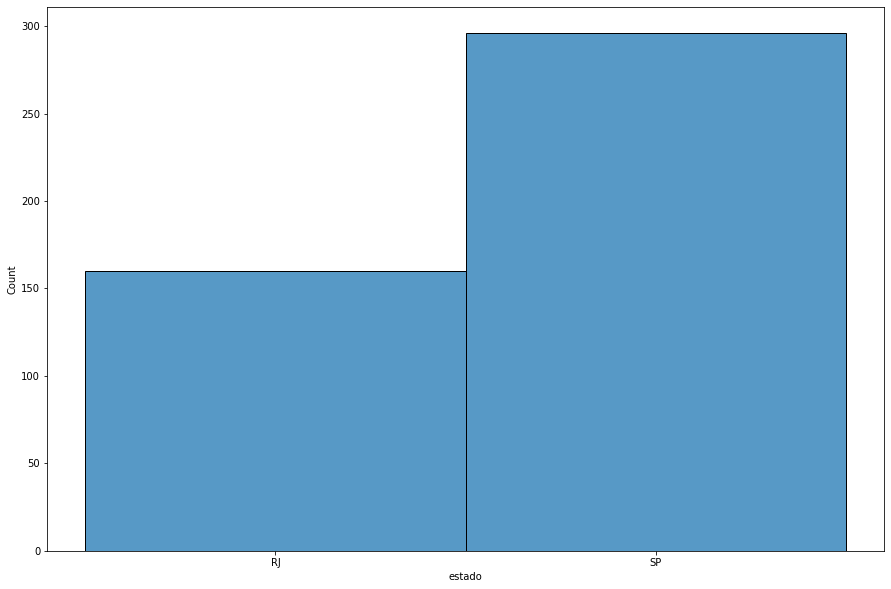

In [9]:
# Plot Estado
plt.figure(figsize=(15, 10))
sns.histplot(df.estado)

<AxesSubplot:xlabel='potencial', ylabel='Count'>

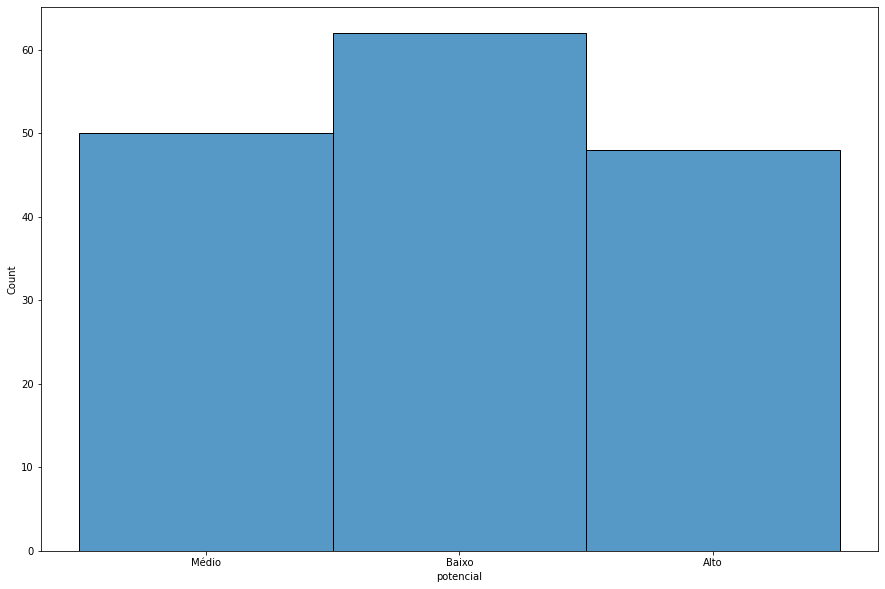

In [10]:
# Plot potencial
plt.figure(figsize=(15, 10))
sns.histplot(df.potencial)

# 1.0 Estimar o faturamento que uma loja teria em cada um dos bairros de SP

In [11]:
citys = df.cidade.unique()
states = df.estado.unique()

print(f"States: {states} \nCitys: {citys}")

States: ['RJ' 'SP'] 
Citys: ['Rio de Janeiro' 'São Paulo']


In [12]:
# Get data of RJ (train) and get data SP to predict and
# remove information that will not be used
infoToDrop = ['codigo', 'nome', 'estado', 'cidade', 'potencial']

dfRJFull = df[df['estado'].str.contains('RJ', regex=False)]
dfRJ = dfRJFull.drop(infoToDrop, axis=1)
dfSPFull = df[df['estado'].str.contains('SP', regex=False)]
dfSP = dfSPFull.drop(infoToDrop, axis=1)

## 1.1 EDA

In [13]:
# Preview the training data
dfRJ.sample(5)

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
142    25341.0   1998.0      1039.0      1454.0      1589.0      3636.0   
77     33122.0   2706.0      1327.0      1912.0      2154.0      4899.0   
86     25119.0   3040.0      1460.0      2044.0      2038.0      3741.0   
137    58172.0   9222.0      4258.0      5189.0      4395.0      8075.0   
113    65958.0   8037.0      3784.0      5024.0      4694.0     10060.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
142      5685.0      3910.0       6030.0           0.0        1057.0   
77       7302.0      4921.0       7901.0         809.0        1824.0   
86       5282.0      3311.0       4203.0           0.0          63.0   
137     11859.0      6616.0       8558.0           0.0           0.0   
113     13880.0      8260.0      12219.0           0.0         484.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
142        2976.0        2350.0        1956.0         772.0          0.0   
77         4160.0        2202.0        1529.0         798.0        265.0   
86          393.0        1766.0        2544.0        2230.0        357.0   
137         423.0        2186.0        4931.0        5847.0       1133.0   
113        3359.0        4409.0        6273.0        4442.0        780.0   

     domiciliosE rendaMedia  faturamento  
142        212.0     4001.0    1200769.0  
77         393.0     6499.0    1448872.0  
86        1226.0     1550.0     754735.0  
137       4395.0     1139.0     450723.0  
113       2418.0     2162.0     848230.0

In [14]:
# Get summary of training data frame.
dfRJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     160 non-null    float64
 1   popAte9       160 non-null    float64
 2   popDe10a14    160 non-null    float64
 3   popDe15a19    160 non-null    float64
 4   popDe20a24    160 non-null    float64
 5   popDe25a34    160 non-null    float64
 6   popDe35a49    160 non-null    float64
 7   popDe50a59    160 non-null    float64
 8   popMaisDe60   160 non-null    float64
 9   domiciliosA1  160 non-null    float64
 10  domiciliosA2  160 non-null    float64
 11  domiciliosB1  160 non-null    float64
 12  domiciliosB2  160 non-null    float64
 13  domiciliosC1  160 non-null    float64
 14  domiciliosC2  160 non-null    float64
 15  domiciliosD   160 non-null    float64
 16  domiciliosE   160 non-null    float64
 17  rendaMedia    154 non-null    object 
 18  faturamento   160 non-null    

In [15]:
# check if any value id different of a float
for rm in dfRJ.rendaMedia:
    if type(rm) != float:
        print(rm)

In [16]:
# Convert object data to float
dfRJ['rendaMedia'] = dfRJ['rendaMedia'].astype(float)
dfRJFull['rendaMedia'] = dfRJ['rendaMedia']

# Get summary of data frame
dfRJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     160 non-null    float64
 1   popAte9       160 non-null    float64
 2   popDe10a14    160 non-null    float64
 3   popDe15a19    160 non-null    float64
 4   popDe20a24    160 non-null    float64
 5   popDe25a34    160 non-null    float64
 6   popDe35a49    160 non-null    float64
 7   popDe50a59    160 non-null    float64
 8   popMaisDe60   160 non-null    float64
 9   domiciliosA1  160 non-null    float64
 10  domiciliosA2  160 non-null    float64
 11  domiciliosB1  160 non-null    float64
 12  domiciliosB2  160 non-null    float64
 13  domiciliosC1  160 non-null    float64
 14  domiciliosC2  160 non-null    float64
 15  domiciliosD   160 non-null    float64
 16  domiciliosE   160 non-null    float64
 17  rendaMedia    154 non-null    float64
 18  faturamento   160 non-null    

In [17]:
# Get the number of distinct elements in training data
dfRJ.nunique()

população       159
popAte9         159
popDe10a14      159
popDe15a19      156
popDe20a24      158
popDe25a34      160
popDe35a49      159
popDe50a59      159
popMaisDe60     157
domiciliosA1     41
domiciliosA2    106
domiciliosB1    153
domiciliosB2    155
domiciliosC1    158
domiciliosC2    159
domiciliosD     143
domiciliosE     158
rendaMedia      146
faturamento     160
dtype: int64

In [18]:
# Get descriptive statistics on training data
dfRJ.describe().T

count           mean            std      min        25%  \
população     160.0   42654.350000   64262.949072    173.0   13362.75   
popAte9       160.0    5329.062500   10816.199770     33.0    1512.75   
popDe10a14    160.0    2484.443750    4948.827166     13.0     690.75   
popDe15a19    160.0    3272.156250    5752.156303     22.0     945.00   
popDe20a24    160.0    3349.381250    5601.893201     17.0     994.75   
popDe25a34    160.0    6584.475000    9049.895783     28.0    2131.25   
popDe35a49    160.0    8826.862500   11536.276416     38.0    2900.75   
popDe50a59    160.0    5332.262500    7986.261929     10.0    1598.75   
popMaisDe60   160.0    7475.706250   10258.307743     12.0    2118.25   
domiciliosA1  160.0     388.475000    1403.605232      0.0       0.00   
domiciliosA2  160.0     608.268750    1535.237669      0.0       0.00   
domiciliosB1  160.0    1871.562500    2973.530791      0.0     391.50   
domiciliosB2  160.0    2385.075000    2779.071565      0.0     716.00   
domiciliosC1  160.0    3539.850000    4324.539462      5.0    1088.75   
domiciliosC2  160.0    3030.806250    4003.047836      3.0     789.75   
domiciliosD   160.0     568.375000     823.920340      0.0     117.75   
domiciliosE   160.0    1821.612500    2292.079295      2.0     431.50   
rendaMedia    154.0    3608.071429    6091.865305    654.0    1486.00   
faturamento   160.0  876159.968750  438210.595559  24651.0  711278.50   

                   50%        75%        max  
população      26076.0   46504.50   667603.0  
popAte9         3111.5    5622.25   122578.0  
popDe10a14      1434.0    2621.50    55935.0  
popDe15a19      2015.0    3448.75    62342.0  
popDe20a24      2142.5    3451.75    60567.0  
popDe25a34      4170.5    7145.25    86116.0  
popDe35a49      5657.0    9586.75   105316.0  
popDe50a59      3371.5    6333.25    83341.0  
popMaisDe60     4575.5    9196.00    91408.0  
domiciliosA1       0.0       1.00    13408.0  
domiciliosA2     107.5     430.50    11668.0  
domiciliosB1     848.0    1962.50    19350.0  
domiciliosB2    1536.0    3065.75    21237.0  
domiciliosC1    2394.5    4203.00    33111.0  
domiciliosC2    1861.5    3652.50    25779.0  
domiciliosD      327.5     694.00     4956.0  
domiciliosE     1042.5    2138.25    14833.0  
rendaMedia      1915.5    2954.50    63887.0  
faturamento   824228.5  934320.75  2915612.0

<AxesSubplot:xlabel='faturamento', ylabel='Count'>

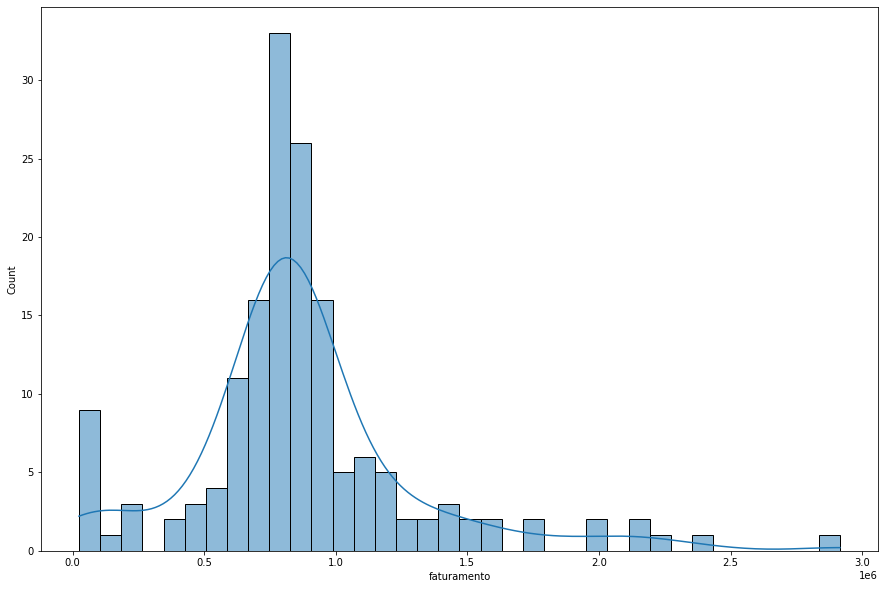

In [19]:
# Plot Faturamento
plt.figure(figsize=(15, 10))
sns.histplot(df['faturamento'], kde=True)

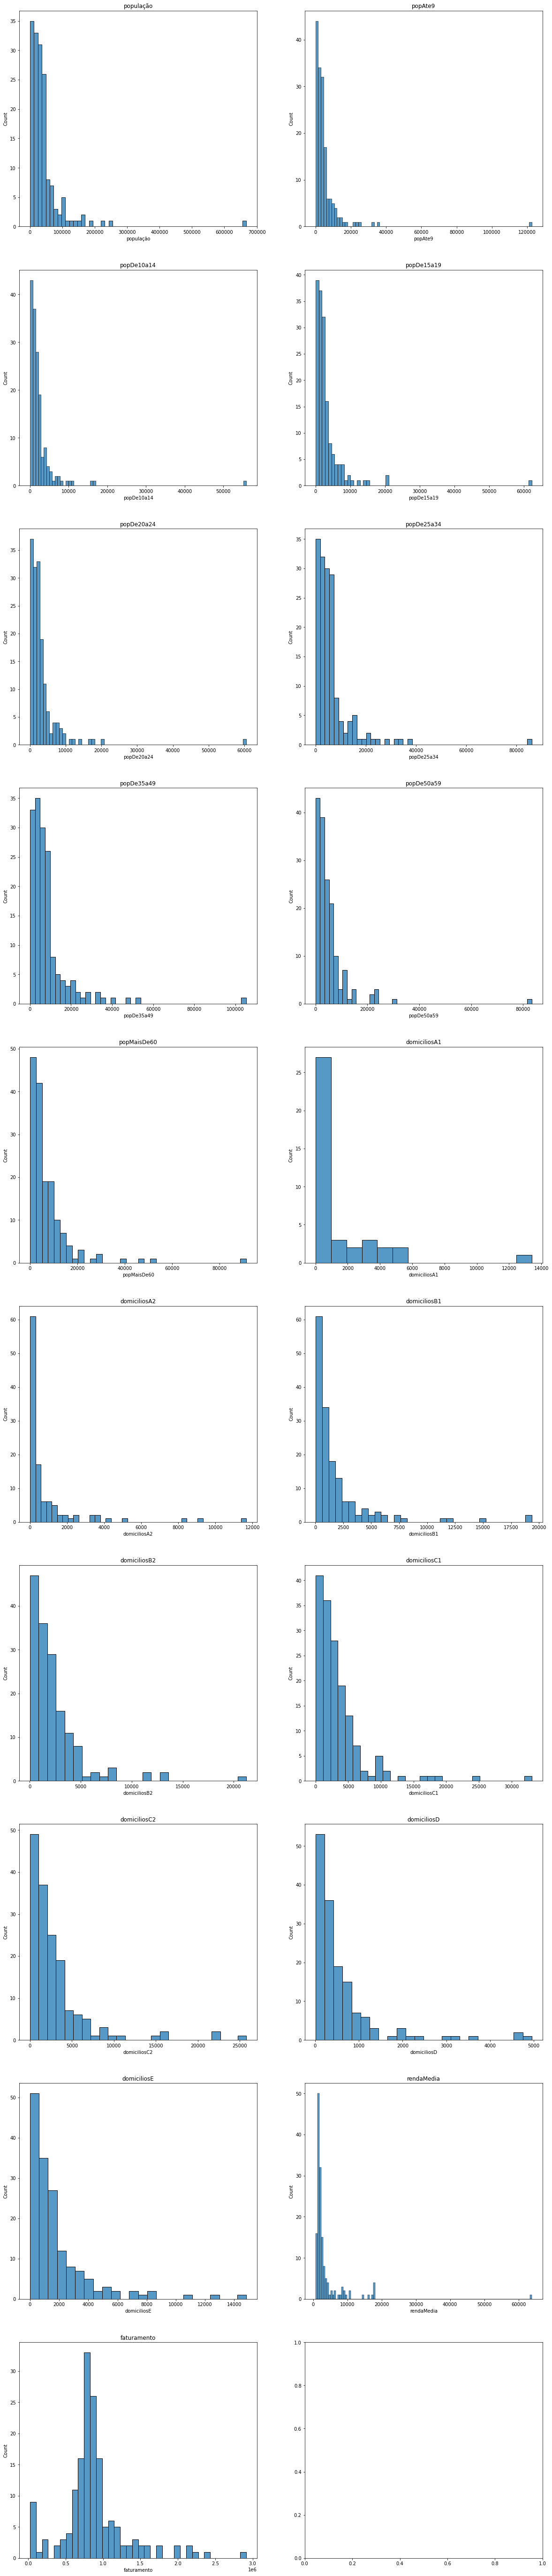

In [20]:
# Plots
cols = dfRJ.columns
fig, axes = plt.subplots(10, 2, figsize = (20, 100))

for i, name in enumerate(cols):
    r, c = i//2, i%2
    d = dfRJ[dfRJ[name] > 0]
    sns.histplot(data = d[name], ax = axes[r, c])
    axes[r, c].set_title(name)

## 1.2 Handling null values in the training dataset

In [21]:
# Check null values in RJ
dfRJ.isnull().sum()

população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

In [22]:
# Checking null values in percentage
dfRJ.isnull().mean()*100

população       0.00
popAte9         0.00
popDe10a14      0.00
popDe15a19      0.00
popDe20a24      0.00
popDe25a34      0.00
popDe35a49      0.00
popDe50a59      0.00
popMaisDe60     0.00
domiciliosA1    0.00
domiciliosA2    0.00
domiciliosB1    0.00
domiciliosB2    0.00
domiciliosC1    0.00
domiciliosC2    0.00
domiciliosD     0.00
domiciliosE     0.00
rendaMedia      3.75
faturamento     0.00
dtype: float64

In [23]:
dfRJ[dfRJ['rendaMedia'].isna()]

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
6      24855.0   2427.0      1227.0      1777.0      1804.0      3730.0   
26     12910.0   1773.0       805.0      1018.0       999.0      1985.0   
52     72501.0   7991.0      3709.0      5257.0      5159.0     10923.0   
71      9538.0   1326.0       629.0       763.0       712.0      1547.0   
89     25969.0   1696.0       843.0      1370.0      1921.0      4020.0   
122    44998.0   5332.0      2397.0      3448.0      3757.0      7160.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
6        5573.0      3556.0       4761.0         355.0         759.0   
26       2526.0      1516.0       2288.0           0.0          18.0   
52      16875.0      9607.0      12980.0         698.0        2569.0   
71       1921.0      1108.0       1532.0           0.0          15.0   
89       5134.0      4124.0       6861.0         739.0        1695.0   
122      9375.0      5527.0       8002.0           0.0         387.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
6          1771.0        1863.0        1902.0        1155.0        326.0   
26          261.0         640.0        1281.0        1140.0        229.0   
52         6042.0        4941.0        5055.0        3919.0        704.0   
71          161.0         492.0         633.0         792.0        197.0   
89         3191.0        1924.0        1522.0         877.0          0.0   
122        2119.0        2775.0        3715.0        3930.0        617.0   

     domiciliosE  rendaMedia  faturamento  
6          424.0         NaN    1092081.0  
26         703.0         NaN     791170.0  
52        1670.0         NaN    1297388.0  
71         540.0         NaN     822849.0  
89         497.0         NaN    1384873.0  
122       1681.0         NaN     789463.0

### 1.2.1 Fix null value

In [24]:
data = dfRJ.copy()
data = data.dropna(subset=['rendaMedia'])
data = data.drop("faturamento", axis=1)
data.sample(5)

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
34    30071.0   4181.0      1904.0      2330.0      2467.0      4745.0   
54    13480.0   1905.0       933.0      1140.0      1233.0      2195.0   
27    16597.0   2079.0      1011.0      1299.0      1273.0      2411.0   
16    60893.0   6812.0      3350.0      4778.0      4801.0      9037.0   
41    32069.0   3979.0      1912.0      2679.0      2492.0      5034.0   

    popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
34      6445.0      3647.0       4352.0           0.0           0.0   
54      2879.0      1491.0       1704.0           0.0           0.0   
27      3502.0      1998.0       3024.0           0.0           0.0   
16     12955.0      7746.0      11414.0           0.0         494.0   
41      7247.0      3936.0       4790.0           0.0         117.0   

    domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
34         248.0        1379.0        2845.0        3259.0        562.0   
54          91.0         480.0        1334.0        1253.0        240.0   
27         335.0         988.0        1755.0        1384.0        329.0   
16        1716.0        3817.0        6026.0        4216.0        610.0   
41        1009.0        2342.0        3345.0        2339.0        511.0   

    domiciliosE  rendaMedia  
34       1738.0      1221.0  
54       1025.0      1133.0  
27        794.0      1499.0  
16       3385.0      1874.0  
41       1041.0      1892.0

In [25]:
data.corr()['rendaMedia'].sort_values(ascending=False)

rendaMedia      1.000000
domiciliosA1    0.502224
domiciliosA2    0.414954
domiciliosB1    0.245900
popMaisDe60     0.074336
popDe50a59      0.009856
domiciliosB2   -0.021212
popDe35a49     -0.025153
população      -0.026747
popDe25a34     -0.037166
popDe20a24     -0.059987
popAte9        -0.071316
popDe15a19     -0.075903
popDe10a14     -0.078434
domiciliosC1   -0.128446
domiciliosE    -0.138307
domiciliosC2   -0.166935
domiciliosD    -0.177658
Name: rendaMedia, dtype: float64

In [26]:
importantFeatures = list(data.corr()["rendaMedia"]
                         [abs(data.corr()["rendaMedia"]) >= 0.15].index)

data = data[importantFeatures]

data.sample(5)

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD  \
65          799.0        1139.0        2136.0         313.0         85.0   
100           0.0           0.0         209.0        2763.0        420.0   
145         417.0         592.0         862.0         156.0          0.0   
30            0.0          18.0         203.0         477.0         72.0   
70          429.0         342.0         971.0        3625.0        716.0   

     rendaMedia  
65       9504.0  
100      1113.0  
145     10573.0  
30       1809.0  
70       4313.0

In [27]:
# Define the Training dataset
X = data.drop("rendaMedia", axis=1)
y = data["rendaMedia"]

# Preview the data
X.head()

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD
0           0.0         145.0         715.0         758.0         92.0
1           0.0           0.0          82.0        2490.0        827.0
2           0.0          96.0         404.0         522.0         77.0
3         114.0         178.0         393.0         584.0        137.0
4           0.0           0.0        1089.0        5422.0       1073.0

In [28]:
# Train a model do predict the renda media

# Gradient Boosting Regression
gbReg = GradientBoostingRegressor(n_estimators=6000,
                                   max_depth=4,
                                   max_features='sqrt',
                                   min_samples_leaf=15,
                                   min_samples_split=10,
                                   loss='huber',
                                   random_state=42)

cvResults = cross_validate(gbReg, X, y, cv=5)
cvResults['test_score'].mean()

0.7698290920944876

In [29]:
# Random Forest Regression
rfReg = RandomForestRegressor()

cvResults = cross_validate(rfReg, X, y, cv=5)
cvResults['test_score'].mean()

0.5909956579009804

In [30]:
gbReg.fit(X, y)

GradientBoostingRegressor(loss='huber', max_depth=4, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=6000, random_state=42)

### 1.2.2 Complete dataFrame

In [31]:
dataPredict = dfRJ[dfRJ['rendaMedia'].isna()].drop('faturamento', axis=1)
dataPredict

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
6      24855.0   2427.0      1227.0      1777.0      1804.0      3730.0   
26     12910.0   1773.0       805.0      1018.0       999.0      1985.0   
52     72501.0   7991.0      3709.0      5257.0      5159.0     10923.0   
71      9538.0   1326.0       629.0       763.0       712.0      1547.0   
89     25969.0   1696.0       843.0      1370.0      1921.0      4020.0   
122    44998.0   5332.0      2397.0      3448.0      3757.0      7160.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
6        5573.0      3556.0       4761.0         355.0         759.0   
26       2526.0      1516.0       2288.0           0.0          18.0   
52      16875.0      9607.0      12980.0         698.0        2569.0   
71       1921.0      1108.0       1532.0           0.0          15.0   
89       5134.0      4124.0       6861.0         739.0        1695.0   
122      9375.0      5527.0       8002.0           0.0         387.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
6          1771.0        1863.0        1902.0        1155.0        326.0   
26          261.0         640.0        1281.0        1140.0        229.0   
52         6042.0        4941.0        5055.0        3919.0        704.0   
71          161.0         492.0         633.0         792.0        197.0   
89         3191.0        1924.0        1522.0         877.0          0.0   
122        2119.0        2775.0        3715.0        3930.0        617.0   

     domiciliosE  rendaMedia  
6          424.0         NaN  
26         703.0         NaN  
52        1670.0         NaN  
71         540.0         NaN  
89         497.0         NaN  
122       1681.0         NaN

In [32]:
dataPredict = dataPredict[importantFeatures]
dataPredict = dataPredict.drop('rendaMedia', axis=1)
dataPredict

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD
6           355.0         759.0        1771.0        1155.0        326.0
26            0.0          18.0         261.0        1140.0        229.0
52          698.0        2569.0        6042.0        3919.0        704.0
71            0.0          15.0         161.0         792.0        197.0
89          739.0        1695.0        3191.0         877.0          0.0
122           0.0         387.0        2119.0        3930.0        617.0

In [33]:
predict = gbReg.predict(dataPredict)
predict

array([ 4151.88977518,  1331.51617632,  4523.54031614,  1682.99887034,
       12429.76636519,  1936.61777317])

In [34]:
dfRJ['rendaMedia'][6] = predict[0]
dfRJFull['rendaMedia'][6] = predict[0]

dfRJ['rendaMedia'][26] = predict[1]
dfRJFull['rendaMedia'][26] = predict[1]

dfRJ['rendaMedia'][52] = predict[2]
dfRJFull['rendaMedia'][52] = predict[2]

dfRJ['rendaMedia'][71] = predict[3]
dfRJFull['rendaMedia'][71] = predict[3]

dfRJ['rendaMedia'][89] = predict[4]
dfRJFull['rendaMedia'][89] = predict[4]

dfRJ['rendaMedia'][122] = predict[5]
dfRJFull['rendaMedia'][122] = predict[5]

In [35]:
dfRJ['rendaMedia'][26]

1331.5161763229282

In [36]:
# Drop null elements
# dfRJ = dfRJ.dropna(subset=['rendaMedia'])
# dfRJFull = dfRJFull.dropna(subset=['rendaMedia'])
# dfRJ.isnull().sum()

In [37]:
dfRJ.shape

(160, 19)

In [38]:
# Get summary of data frame
dfRJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     160 non-null    float64
 1   popAte9       160 non-null    float64
 2   popDe10a14    160 non-null    float64
 3   popDe15a19    160 non-null    float64
 4   popDe20a24    160 non-null    float64
 5   popDe25a34    160 non-null    float64
 6   popDe35a49    160 non-null    float64
 7   popDe50a59    160 non-null    float64
 8   popMaisDe60   160 non-null    float64
 9   domiciliosA1  160 non-null    float64
 10  domiciliosA2  160 non-null    float64
 11  domiciliosB1  160 non-null    float64
 12  domiciliosB2  160 non-null    float64
 13  domiciliosC1  160 non-null    float64
 14  domiciliosC2  160 non-null    float64
 15  domiciliosD   160 non-null    float64
 16  domiciliosE   160 non-null    float64
 17  rendaMedia    160 non-null    float64
 18  faturamento   160 non-null    

## 1.3 Check outliers

In [39]:
# Z-score test

threshold = 3

for col in dfRJ:
    outlier = []
    mean = np.mean(dfRJ[col])
    std = np.std(dfRJ[col])

    print(f'\nLabel: {col} - Mean: {mean: .2f} - Std: {std: .2f}')

    for i in dfRJ[col]:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)

    print(f'The {len(outlier)} outliers are: ')
    print(f'    {outlier}')
    print("*"*50)


Label: população - Mean:  42654.35 - Std:  64061.81
The 2 outliers are: 
    [249987.0, 667603.0]
**************************************************

Label: popAte9 - Mean:  5329.06 - Std:  10782.35
The 1 outliers are: 
    [122578.0]
**************************************************

Label: popDe10a14 - Mean:  2484.44 - Std:  4933.34
The 1 outliers are: 
    [55935.0]
**************************************************

Label: popDe15a19 - Mean:  3272.16 - Std:  5734.15
The 3 outliers are: 
    [20926.0, 62342.0, 20998.0]
**************************************************

Label: popDe20a24 - Mean:  3349.38 - Std:  5584.36
The 2 outliers are: 
    [20146.0, 60567.0]
**************************************************

Label: popDe25a34 - Mean:  6584.48 - Std:  9021.57
The 3 outliers are: 
    [37750.0, 86116.0, 34697.0]
**************************************************

Label: popDe35a49 - Mean:  8826.86 - Std:  11500.17
The 3 outliers are: 
    [53090.0, 105316.0, 46774.0]
*********

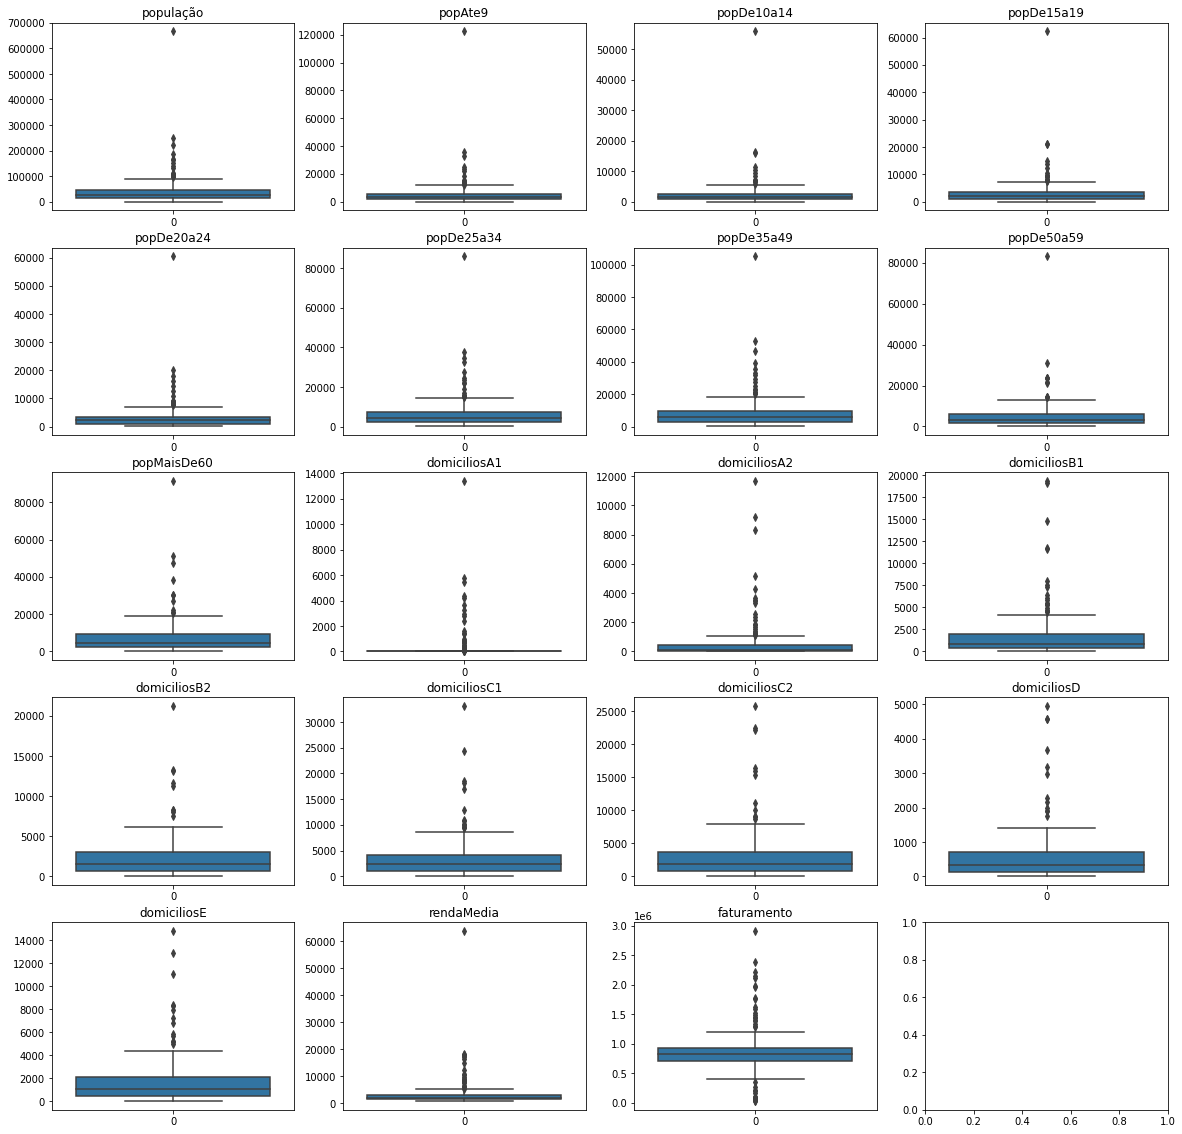

In [40]:
# Check by Box Plot
cols = dfRJ.columns
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

for i, name in enumerate(cols):
    r, c = i // 4, i % 4
    sns.boxplot(data=dfRJ[name], ax=axes[r, c])
    axes[r, c].set_title(name)

## 1.4 Get the best features to solve the 'faturamento' problem

In [41]:
dfRJ.corr()['faturamento'].sort_values(ascending=False)

faturamento     1.000000
domiciliosA2    0.783591
domiciliosA1    0.754193
domiciliosB1    0.614206
rendaMedia      0.560304
popMaisDe60     0.139008
domiciliosB2    0.013797
popDe50a59     -0.067345
população      -0.166563
popDe35a49     -0.170591
popDe25a34     -0.195332
popDe20a24     -0.250416
popDe15a19     -0.293721
popAte9        -0.300307
popDe10a14     -0.306282
domiciliosC1   -0.324634
domiciliosE    -0.415151
domiciliosC2   -0.479576
domiciliosD    -0.513458
Name: faturamento, dtype: float64

In [42]:
importantFeaturesFaturamento = list(dfRJ.corr()
                                    ["faturamento"]
                                    [abs(dfRJ.corr()["faturamento"])
                                    > 0.4].index)
for idx, col in enumerate(importantFeaturesFaturamento):
    print(f"Importante cols {idx + 1}/{len(importantFeaturesFaturamento)}: \
          {col}")

Importante cols 1/8:           domiciliosA1
Importante cols 2/8:           domiciliosA2
Importante cols 3/8:           domiciliosB1
Importante cols 4/8:           domiciliosC2
Importante cols 5/8:           domiciliosD
Importante cols 6/8:           domiciliosE
Importante cols 7/8:           rendaMedia
Importante cols 8/8:           faturamento


In [43]:
dfRJ = dfRJ[importantFeaturesFaturamento]

In [44]:
# Preview the train data
dfRJ.sample(5)

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD  \
96            0.0         179.0        1446.0        2543.0        413.0   
151          18.0          47.0         124.0        1647.0        149.0   
7             0.0          82.0         491.0        1177.0        172.0   
20            4.0          52.0         144.0         132.0         35.0   
60            0.0           0.0           0.0          17.0          8.0   

     domiciliosE  rendaMedia  faturamento  
96        1635.0      1952.0     858291.0  
151        827.0      1495.0     700834.0  
7          352.0      1962.0     808554.0  
20          92.0      2929.0     876113.0  
60          16.0       654.0     835491.0

In [45]:
# Define the Training dataset
X = dfRJ.drop("faturamento", axis=1)
y = dfRJ["faturamento"]

# Preview the data
X.head()

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD  \
0           0.0         145.0         715.0         758.0         92.0   
1           0.0           0.0          82.0        2490.0        827.0   
2           0.0          96.0         404.0         522.0         77.0   
3         114.0         178.0         393.0         584.0        137.0   
4           0.0           0.0        1089.0        5422.0       1073.0   

   domiciliosE  rendaMedia  
0        304.0      2501.0  
1       2506.0       931.0  
2        254.0      2391.0  
3        286.0      3727.0  
4       3261.0      1380.0

In [46]:
# Preview the data
y.head()

0    932515.0
1    588833.0
2    874200.0
3    912226.0
4    553020.0
Name: faturamento, dtype: float64

## 1.5 Train Model

In [47]:
# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)


# Define error metrics
def evaluationRegression(*args):
    """ Evaluate the model using cross-validation or receiving
        the prediction and groundtruth

    Args:
        args: If len == 1. Get the model to cross-validation
        args: If len == 2. Get the prediction and groundtruth

    Returns:
        Error metrics: MAE, MSE, RMSE, R²
    """
    if len(args) == 1:
        cvResults = cross_validate(args[0], X, y,
                                    scoring=('neg_mean_absolute_error',
                                             'neg_mean_squared_error',
                                             'r2'), cv=kf)
        mae = -cvResults['test_neg_mean_absolute_error']
        mse = -cvResults['test_neg_mean_squared_error']
        rmse = np.sqrt(mse)
        rSquared = cvResults['test_r2']
        
        return mae, mse, rmse, rSquared
    elif len(args) == 2:  # y, predictions
        mae = mean_absolute_error(args[0], args[1])
        mse = mean_squared_error(args[0], args[1])
        rmse = np.sqrt(mean_squared_error(args[0], args[1]))
        rSquared = r2_score(args[0], args[1])
        
        return mae, mse, rmse, rSquared

    return None, None, None, None

### 1.5.1Setup models

In [48]:
# Create df to validate models
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

# Linear Regression Model
linearReg = LinearRegression()
mae, mse, rmse, rSquared = evaluationRegression(linearReg)
newRow = {"Model": "LinearRegression", "MAE": mae.mean(), "MSE": mse.mean(),
           "RMSE": rmse.mean(), "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Ridge Regression
ridgeReg = Ridge(alpha=0.5)
mae, mse, rmse, rSquared = evaluationRegression(ridgeReg)
newRow = {"Model": "RidgeRegression", "MAE": mae.mean(), "MSE": mse.mean(),
           "RMSE": rmse.mean(), "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Lasso Regression
lassoReg = Lasso(alpha=0.5)  # You can adjust the alpha parameter
mae, mse, rmse, rSquared = evaluationRegression(lassoReg)
newRow = {"Model": "LassoRegression", "MAE": mae.mean(), "MSE": mse.mean(),
           "RMSE": rmse.mean(), "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Random Forest Regression
rfReg = RandomForestRegressor(n_estimators=1200, max_depth=15,
                               min_samples_split=5, min_samples_leaf=5,
                               max_features=None, oob_score=True,
                               random_state=42)
mae, mse, rmse, rSquared = evaluationRegression(rfReg)
newRow = {"Model": "RandomForestRegressor", "MAE": mae.mean(),
           "MSE": mse.mean(), "RMSE": rmse.mean(),
           "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Support Vector Regression
svrReg = SVR(kernel='rbf')
mae, mse, rmse, rSquared = evaluationRegression(svrReg)
newRow = {"Model": "SupportVectorRegression", "MAE": mae.mean(),
           "MSE": mse.mean(), "RMSE": rmse.mean(),
           "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Gradient Boosting Regression
gbReg = GradientBoostingRegressor(n_estimators=6000,
                                   learning_rate=0.01,
                                   max_depth=4,
                                   max_features='sqrt',
                                   min_samples_leaf=15,
                                   min_samples_split=10,
                                   loss='huber',
                                   random_state=42)
mae, mse, rmse, rSquared = evaluationRegression(gbReg)
newRow = {"Model": "GradientBoostingRegression", "MAE": mae.mean(),
           "MSE": mse.mean(), "RMSE": rmse.mean(),
           "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# XGBoost Regression
xgbReg = XGBRegressor(learning_rate=0.01,
                       n_estimators=5000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.55,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00004,
                       random_state=42)
mae, mse, rmse, rSquared = evaluationRegression(xgbReg)
newRow = {"Model": "XGBoostRegression", "MAE": mae.mean(),
           "MSE": mse.mean(), "RMSE": rmse.mean(),
           "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# LightGBM Regression
lgbReg = lgb.LGBMRegressor(n_estimators=1000)
mae, mse, rmse, rSquared = evaluationRegression(lgbReg)
newRow = {"Model": "LGBMRegressor", "MAE": mae.mean(), "MSE": mse.mean(),
           "RMSE": rmse.mean(), "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

# Stacking CV Regressor (Stack up all the models above,
# optimized using xgboost)
stackGenReg = StackingCVRegressor(regressors=(rfReg, svrReg, lassoReg,
                                            ridgeReg, linearReg, xgbReg),
                                meta_regressor=xgbReg,
                                use_features_in_secondary=True)
mae, mse, rmse, rSquared = evaluationRegression(stackGenReg)
newRow = {"Model": "StackingCVRegressor", "MAE": mae.mean(),
           "MSE": mse.mean(), "RMSE": rmse.mean(),
           "R2 Score": rSquared.mean()}
models = models.append(newRow, ignore_index=True)

[20:41:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:30] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:41:50] WARNING: ../src/objective/regression_

### 1.5.2 Model Comparison

In [49]:
models.sort_values(by="RMSE")

Model            MAE                  MSE  \
8         StackingCVRegressor   54588.944775    7676873921.395887   
6           XGBoostRegression   65318.442773   12916398153.155375   
3       RandomForestRegressor   87851.091418   26315354401.051754   
2             LassoRegression   86851.162706   30671918601.725483   
1             RidgeRegression   86851.162758   30671918608.589394   
0            LinearRegression   86851.163443   30671919065.738014   
7               LGBMRegressor  140092.329196   52216138021.901077   
5  GradientBoostingRegression  119406.999234   57158700731.880081   
4     SupportVectorRegression  271153.274231  193325118222.626465   

            RMSE  R2 Score  
8   83956.978445  0.961318  
6  110142.894404  0.932249  
3  154744.923832  0.868563  
2  164424.873908  0.822841  
1  164424.873945  0.822841  
0  164424.875328  0.822841  
7  223746.956036   0.69279  
5  227994.274504  0.712419  
4  430723.614877 -0.020718

### 1.5.4 Blend models

In [50]:
# Blend models in order to make the final predictions
# more robust to overfitting
def blendedPredictions(X):
    return 0.60 * stackGenReg.predict(X) + \
           0.30 * xgbReg.predict(X) + \
           0.10 * rfReg.predict(X)

### 1.5.5 Final model training

In [51]:
stackGenReg.fit(X, y)
xgbReg.fit(X, y)
rfReg.fit(X, y)

[20:43:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:36] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:43:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=1200, oob_score=True,
                      random_state=42)

## 1.6 Predict

### 1.6.1 EDA

In [52]:
# Preview the data
dfSP.head(5)

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
160    94034.0  12668.0      6853.0      9836.0      7487.0     14535.0   
161    32791.0   2297.0      1017.0      2096.0      2197.0      5341.0   
162   104193.0  15070.0      7343.0     10631.0      8657.0     17749.0   
163    12721.0    953.0       343.0       627.0       819.0      2142.0   
164    48417.0   5078.0      2396.0      4018.0      3571.0      7388.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
160     21549.0     10598.0      10508.0           0.0         253.0   
161      7281.0      4917.0       7645.0        1413.0        1734.0   
162     23364.0     11567.0       9812.0           0.0           0.0   
163      2833.0      1790.0       3214.0         624.0         667.0   
164     10751.0      6648.0       8567.0           0.0         303.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
160        2197.0        4368.0        6681.0        7011.0       2247.0   
161        3704.0        2351.0        1946.0         827.0        291.0   
162        1423.0        4875.0        8595.0       10082.0       3111.0   
163        1558.0        1032.0         915.0         361.0         84.0   
164        1794.0        2986.0        4489.0        2836.0       1104.0   

     domiciliosE rendaMedia  faturamento  
160       5670.0     1501.0          NaN  
161       1617.0     5920.0          NaN  
162       5776.0     1284.0          NaN  
163        404.0     6278.0          NaN  
164       2553.0     1905.0          NaN

In [53]:
# Fix index
dfSP.reset_index(drop=True, inplace=True)
dfSPFull.reset_index(drop=True, inplace=True)

# Preview the data
dfSP.head(5)

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
0    94034.0  12668.0      6853.0      9836.0      7487.0     14535.0   
1    32791.0   2297.0      1017.0      2096.0      2197.0      5341.0   
2   104193.0  15070.0      7343.0     10631.0      8657.0     17749.0   
3    12721.0    953.0       343.0       627.0       819.0      2142.0   
4    48417.0   5078.0      2396.0      4018.0      3571.0      7388.0   

   popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
0     21549.0     10598.0      10508.0           0.0         253.0   
1      7281.0      4917.0       7645.0        1413.0        1734.0   
2     23364.0     11567.0       9812.0           0.0           0.0   
3      2833.0      1790.0       3214.0         624.0         667.0   
4     10751.0      6648.0       8567.0           0.0         303.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0        2197.0        4368.0        6681.0        7011.0       2247.0   
1        3704.0        2351.0        1946.0         827.0        291.0   
2        1423.0        4875.0        8595.0       10082.0       3111.0   
3        1558.0        1032.0         915.0         361.0         84.0   
4        1794.0        2986.0        4489.0        2836.0       1104.0   

   domiciliosE rendaMedia  faturamento  
0       5670.0     1501.0          NaN  
1       1617.0     5920.0          NaN  
2       5776.0     1284.0          NaN  
3        404.0     6278.0          NaN  
4       2553.0     1905.0          NaN

In [54]:
# Get summary of data frame
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     296 non-null    float64
 1   popAte9       296 non-null    float64
 2   popDe10a14    296 non-null    float64
 3   popDe15a19    296 non-null    float64
 4   popDe20a24    296 non-null    float64
 5   popDe25a34    296 non-null    float64
 6   popDe35a49    296 non-null    float64
 7   popDe50a59    296 non-null    float64
 8   popMaisDe60   296 non-null    float64
 9   domiciliosA1  296 non-null    float64
 10  domiciliosA2  296 non-null    float64
 11  domiciliosB1  296 non-null    float64
 12  domiciliosB2  296 non-null    float64
 13  domiciliosC1  296 non-null    float64
 14  domiciliosC2  296 non-null    float64
 15  domiciliosD   296 non-null    float64
 16  domiciliosE   296 non-null    float64
 17  rendaMedia    296 non-null    object 
 18  faturamento   0 non-null      

In [55]:
# Check values that are different from numbers
for r in dfSP.rendaMedia:
    if type(r) != float:
        print(f'Value is "{r}"')

Value is "-"
Value is "-"
Value is "-"


In [56]:
# Get indexes
dfSP.loc[dfSP['rendaMedia'] == '-']

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
72         0.0      0.0         0.0         0.0         0.0         0.0   
201        0.0      0.0         0.0         0.0         0.0         0.0   
216        0.0      0.0         0.0         0.0         0.0         0.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
72          0.0         0.0          0.0           0.0           0.0   
201         0.0         0.0          0.0           0.0           0.0   
216         0.0         0.0          0.0           0.0           0.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
72            0.0           0.0           0.0           0.0          0.0   
201           0.0           0.0           0.0           0.0          0.0   
216           0.0           0.0           0.0           0.0          0.0   

     domiciliosE rendaMedia  faturamento  
72           0.0          -          NaN  
201          0.0          -          NaN  
216          0.0          -          NaN

In [57]:
# Convert '-' to 0
dfSP.rendaMedia[72] = 0
dfSP.rendaMedia[201] = 0
dfSP.rendaMedia[216] = 0

In [58]:
# Convert 'renda media' from object to float
dfSP.rendaMedia = dfSP.rendaMedia.astype(float)
dfSPFull.rendaMedia = dfSP.rendaMedia

# Get summary of data frame
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     296 non-null    float64
 1   popAte9       296 non-null    float64
 2   popDe10a14    296 non-null    float64
 3   popDe15a19    296 non-null    float64
 4   popDe20a24    296 non-null    float64
 5   popDe25a34    296 non-null    float64
 6   popDe35a49    296 non-null    float64
 7   popDe50a59    296 non-null    float64
 8   popMaisDe60   296 non-null    float64
 9   domiciliosA1  296 non-null    float64
 10  domiciliosA2  296 non-null    float64
 11  domiciliosB1  296 non-null    float64
 12  domiciliosB2  296 non-null    float64
 13  domiciliosC1  296 non-null    float64
 14  domiciliosC2  296 non-null    float64
 15  domiciliosD   296 non-null    float64
 16  domiciliosE   296 non-null    float64
 17  rendaMedia    296 non-null    float64
 18  faturamento   0 non-null      

In [59]:
dfSPFull.isnull().sum()

codigo            0
nome              0
cidade            0
estado            0
população         0
popAte9           0
popDe10a14        0
popDe15a19        0
popDe20a24        0
popDe25a34        0
popDe35a49        0
popDe50a59        0
popMaisDe60       0
domiciliosA1      0
domiciliosA2      0
domiciliosB1      0
domiciliosB2      0
domiciliosC1      0
domiciliosC2      0
domiciliosD       0
domiciliosE       0
rendaMedia        0
faturamento     296
potencial       296
dtype: int64

In [60]:
# Get feature to predict and drop faturamento
dfSPFeatures = dfSP[importantFeaturesFaturamento].drop("faturamento", axis=1)

# Preview the data
dfSPFeatures.sample(5)

domiciliosA1  domiciliosA2  domiciliosB1  domiciliosC2  domiciliosD  \
226          36.0         105.0        1021.0        1918.0        344.0   
80            0.0           0.0         139.0        3579.0       1200.0   
39            0.0           0.0           9.0          38.0         11.0   
184           0.0          36.0         393.0         523.0         95.0   
236           0.0          66.0         364.0        1333.0        292.0   

     domiciliosE  rendaMedia  
226       1554.0      1978.0  
80        2271.0      1063.0  
39          24.0      1365.0  
184        664.0      1816.0  
236        770.0      1607.0

In [61]:
# Predict
faturamentoSP = blendedPredictions(dfSPFeatures)
faturamentoSP[:5]

array([ 223647.61180665, 1457812.47515669,  143975.35718702,
       1248562.94975674,  753937.09510407])

In [62]:
# If Faturamento is lower than 0 set is to 0
for idx in range(len(faturamentoSP)):
    if faturamentoSP[idx] <= 0:
        print('Value equal or lower 0')
        print(faturamentoSP[idx])
        faturamentoSP[idx] = 0

In [63]:
dfSP['faturamento'] = faturamentoSP
dfSPFull['faturamento'] = faturamentoSP

# Preview the data
dfSPFull.head(5)

codigo            nome     cidade estado  população  popAte9  \
0  355030251.0  A. E. Carvalho  São Paulo     SP    94034.0  12668.0   
1   35503020.0       Aclimação  São Paulo     SP    32791.0   2297.0   
2  355030285.0      Adventista  São Paulo     SP   104193.0  15070.0   
3   35503088.0     Água Branca  São Paulo     SP    12721.0    953.0   
4   35503066.0      Água Funda  São Paulo     SP    48417.0   5078.0   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
0      6853.0      9836.0      7487.0     14535.0  ...         253.0   
1      1017.0      2096.0      2197.0      5341.0  ...        1734.0   
2      7343.0     10631.0      8657.0     17749.0  ...           0.0   
3       343.0       627.0       819.0      2142.0  ...         667.0   
4      2396.0      4018.0      3571.0      7388.0  ...         303.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0        2197.0        4368.0        6681.0        7011.0       2247.0   
1        3704.0        2351.0        1946.0         827.0        291.0   
2        1423.0        4875.0        8595.0       10082.0       3111.0   
3        1558.0        1032.0         915.0         361.0         84.0   
4        1794.0        2986.0        4489.0        2836.0       1104.0   

   domiciliosE  rendaMedia   faturamento  potencial  
0       5670.0      1501.0  2.236476e+05        NaN  
1       1617.0      5920.0  1.457812e+06        NaN  
2       5776.0      1284.0  1.439754e+05        NaN  
3        404.0      6278.0  1.248563e+06        NaN  
4       2553.0      1905.0  7.539371e+05        NaN  

[5 rows x 24 columns]

In [64]:
# Get descriptive statistics
dfSPFull.describe().T

count          mean           std           min           25%  \
codigo        296.0  2.494567e+08  1.515552e+08  3.550301e+06  3.550308e+07   
população     296.0  4.065358e+04  3.474601e+04  0.000000e+00  1.632125e+04   
popAte9       296.0  4.830253e+03  5.220828e+03  0.000000e+00  1.243000e+03   
popDe10a14    296.0  2.363618e+03  2.642612e+03  0.000000e+00  5.607500e+02   
popDe15a19    296.0  3.585152e+03  3.789359e+03  0.000000e+00  1.012250e+03   
popDe20a24    296.0  3.020412e+03  2.846438e+03  0.000000e+00  1.024000e+03   
popDe25a34    296.0  6.440503e+03  5.630255e+03  0.000000e+00  2.398500e+03   
popDe35a49    296.0  9.137669e+03  7.810301e+03  0.000000e+00  3.632750e+03   
popDe50a59    296.0  5.081111e+03  3.912440e+03  0.000000e+00  2.250500e+03   
popMaisDe60   296.0  6.194861e+03  4.093907e+03  0.000000e+00  3.046250e+03   
domiciliosA1  296.0  4.148311e+02  7.883859e+02  0.000000e+00  0.000000e+00   
domiciliosA2  296.0  5.659257e+02  7.128852e+02  0.000000e+00  3.425000e+01   
domiciliosB1  296.0  1.911422e+03  1.495616e+03  0.000000e+00  8.047500e+02   
domiciliosB2  296.0  2.250064e+03  1.697741e+03  0.000000e+00  9.300000e+02   
domiciliosC1  296.0  2.957264e+03  2.863678e+03  0.000000e+00  8.287500e+02   
domiciliosC2  296.0  2.657051e+03  3.094686e+03  0.000000e+00  4.972500e+02   
domiciliosD   296.0  7.544392e+02  1.004643e+03  0.000000e+00  9.125000e+01   
domiciliosE   296.0  2.391564e+03  2.407287e+03  0.000000e+00  6.067500e+02   
rendaMedia    296.0  4.012541e+03  3.581697e+03  0.000000e+00  1.561250e+03   
faturamento   296.0  9.087776e+05  4.211392e+05  6.454874e+04  7.006344e+05   

                       50%           75%           max  
codigo        3.550302e+08  3.550302e+08  3.550303e+08  
população     3.312800e+04  5.358100e+04  2.262260e+05  
popAte9       2.981000e+03  6.343000e+03  3.639500e+04  
popDe10a14    1.442000e+03  3.194750e+03  1.816700e+04  
popDe15a19    2.418500e+03  4.646250e+03  2.563700e+04  
popDe20a24    2.217500e+03  3.952000e+03  1.852500e+04  
popDe25a34    5.103000e+03  8.555500e+03  3.657700e+04  
popDe35a49    7.460000e+03  1.224450e+04  5.077300e+04  
popDe50a59    4.412500e+03  7.084750e+03  2.475700e+04  
popMaisDe60   5.585000e+03  8.641500e+03  2.003400e+04  
domiciliosA1  1.300000e+01  6.090000e+02  6.982000e+03  
domiciliosA2  2.965000e+02  8.667500e+02  5.362000e+03  
domiciliosB1  1.582500e+03  2.713500e+03  9.111000e+03  
domiciliosB2  1.954500e+03  3.312000e+03  8.744000e+03  
domiciliosC1  2.067000e+03  4.142500e+03  1.840300e+04  
domiciliosC2  1.537000e+03  3.679500e+03  2.111700e+04  
domiciliosD   3.600000e+02  1.004750e+03  6.680000e+03  
domiciliosE   1.714500e+03  3.088250e+03  1.500100e+04  
rendaMedia    2.322500e+03  5.626000e+03  2.167700e+04  
faturamento   9.022713e+05  1.234565e+06  2.265560e+06

# 2.0 Classificar o potencial de cada bairro como Alto, Médio ou Baixo

In [65]:
# Preview the data
dfRJFull.sample(5)

codigo             nome          cidade estado  população  popAte9  \
128  3.304557e+09     Santa Teresa  Rio de Janeiro     RJ    42081.0   4341.0   
32   3.304557e+09           Cocotá  Rio de Janeiro     RJ     5012.0    382.0   
125  3.304557e+09          Rocinha  Rio de Janeiro     RJ    71315.0  11817.0   
101  3.304557e+09  Parque Anchieta  Rio de Janeiro     RJ    26951.0   3177.0   
2    3.304557e+09       Água Santa  Rio de Janeiro     RJ     9003.0    883.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
128      2130.0      2887.0      3499.0      7584.0  ...         453.0   
32        218.0       282.0       345.0       759.0  ...         113.0   
125      4576.0      6527.0      7855.0     14629.0  ...           0.0   
101      1552.0      2074.0      1876.0      4033.0  ...           0.0   
2         399.0       597.0       762.0      1755.0  ...          96.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
128        2290.0        2790.0        4882.0        3508.0        615.0   
32          374.0         447.0         467.0         257.0         27.0   
125         149.0        2298.0        6761.0        8969.0       1402.0   
101         681.0        1789.0        3055.0        2100.0        243.0   
2           404.0         652.0         644.0         522.0         77.0   

     domiciliosE  rendaMedia  faturamento  potencial  
128       1565.0      2287.0     703465.0       Alto  
32         124.0      2927.0     912281.0      Baixo  
125       5242.0      1037.0      59273.0      Médio  
101       1125.0      1679.0     744303.0      Médio  
2          254.0      2391.0     874200.0      Baixo  

[5 rows x 24 columns]

In [66]:
# Preview the data
dfSPFull.sample(5)

codigo                   nome     cidade estado  população  popAte9  \
17    35503087.0            Barra Funda  São Paulo     SP      320.0     19.0   
250   35503085.0  Vila Anglo Brasileira  São Paulo     SP    13812.0   1178.0   
177  355030282.0         Parque Arariba  São Paulo     SP    63030.0   8748.0   
206   35503086.0                Pompéia  São Paulo     SP    14476.0   1355.0   
135  355030277.0        Jardim São Luís  São Paulo     SP    78224.0  10418.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
17         12.0        18.0        21.0        46.0  ...           3.0   
250       457.0       813.0       975.0      2511.0  ...         522.0   
177      4283.0      5693.0      4923.0     11456.0  ...         474.0   
206       430.0       698.0       766.0      2417.0  ...        1137.0   
135      5028.0      7417.0      6366.0     13427.0  ...         217.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
17           14.0          24.0          26.0          12.0          5.0   
250        1470.0        1340.0        1103.0         518.0          0.0   
177        2375.0        3108.0        4482.0        4059.0       1295.0   
206        2254.0        1126.0         515.0         195.0          0.0   
135        2311.0        4165.0        5867.0        5759.0       1737.0   

     domiciliosE  rendaMedia   faturamento  potencial  
17          24.0      1956.0  8.418790e+05        NaN  
250        414.0      4222.0  1.078993e+06        NaN  
177       5038.0      1809.0  4.861800e+05        NaN  
206        272.0      7356.0  1.321274e+06        NaN  
135       5746.0      1559.0  4.202177e+05        NaN  

[5 rows x 24 columns]

In [67]:
# Get data of RJ (train) and get data SP to predict and remove
# information that will not be used
dfRJ = dfRJFull.drop(['codigo', 'nome', 'estado', 'cidade'], axis=1)
dfSP = dfSPFull.drop(['codigo', 'nome', 'estado', 'cidade'], axis=1)

## 2.1 EDA

In [68]:
# Preview the data
dfRJ.sample(5)

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
60       173.0     33.0        13.0        22.0        17.0        28.0   
119    13009.0   1094.0       515.0       760.0       882.0      1900.0   
113    65958.0   8037.0      3784.0      5024.0      4694.0     10060.0   
115    32064.0   3322.0      1700.0      2162.0      2310.0      4733.0   
61     48475.0   5665.0      2777.0      3497.0      3435.0      7196.0   

     popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
60         38.0        10.0         12.0           0.0           0.0   
119      2707.0      1972.0       3179.0           0.0         154.0   
113     13880.0      8260.0      12219.0           0.0         484.0   
115      6797.0      4385.0       6655.0           0.0         264.0   
61      10091.0      6361.0       9453.0           0.0         115.0   

     domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
60            0.0           0.0           5.0          17.0          8.0   
119         776.0        1407.0        1397.0         693.0        102.0   
113        3359.0        4409.0        6273.0        4442.0        780.0   
115        1151.0        2315.0        3451.0        2773.0        331.0   
61         1257.0        2835.0        4290.0        3527.0        749.0   

     domiciliosE  rendaMedia  faturamento potencial  
60          16.0       654.0     835491.0     Baixo  
119        280.0      2541.0     934074.0     Médio  
113       2418.0      2162.0     848230.0      Alto  
115        910.0      2038.0     806166.0     Médio  
61        3968.0      1483.0     779768.0     Médio

In [69]:
# Get summary of data frame
dfRJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     160 non-null    float64
 1   popAte9       160 non-null    float64
 2   popDe10a14    160 non-null    float64
 3   popDe15a19    160 non-null    float64
 4   popDe20a24    160 non-null    float64
 5   popDe25a34    160 non-null    float64
 6   popDe35a49    160 non-null    float64
 7   popDe50a59    160 non-null    float64
 8   popMaisDe60   160 non-null    float64
 9   domiciliosA1  160 non-null    float64
 10  domiciliosA2  160 non-null    float64
 11  domiciliosB1  160 non-null    float64
 12  domiciliosB2  160 non-null    float64
 13  domiciliosC1  160 non-null    float64
 14  domiciliosC2  160 non-null    float64
 15  domiciliosD   160 non-null    float64
 16  domiciliosE   160 non-null    float64
 17  rendaMedia    160 non-null    float64
 18  faturamento   160 non-null    

In [70]:
dfRJ.isnull().sum()

população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      0
faturamento     0
potencial       0
dtype: int64

In [71]:
dfRJ.potencial.unique()

array(['Médio', 'Baixo', 'Alto'], dtype=object)

<AxesSubplot:xlabel='potencial', ylabel='Count'>

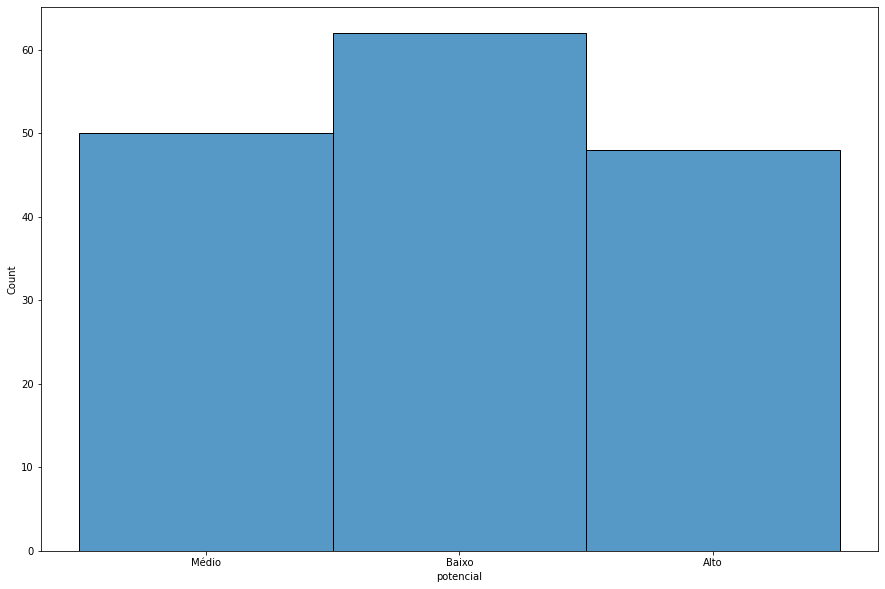

In [72]:
# Plot potencial
plt.figure(figsize=(15, 10))
sns.histplot(dfRJ.potencial)

## 2.2 Convert categorical to numeric

In [73]:
# Convert Potencial from Categorical to Numeric Feature
dfRJ['potencial'].replace(to_replace=['Baixo', 'Médio', 'Alto'],
                          value=[0, 1, 2], inplace=True)

dfRJ.potencial.unique()

array([1, 0, 2])

In [74]:
# Get descriptive statistics on training data
dfRJ.describe().T

count           mean            std      min        25%  \
população     160.0   42654.350000   64262.949072    173.0   13362.75   
popAte9       160.0    5329.062500   10816.199770     33.0    1512.75   
popDe10a14    160.0    2484.443750    4948.827166     13.0     690.75   
popDe15a19    160.0    3272.156250    5752.156303     22.0     945.00   
popDe20a24    160.0    3349.381250    5601.893201     17.0     994.75   
popDe25a34    160.0    6584.475000    9049.895783     28.0    2131.25   
popDe35a49    160.0    8826.862500   11536.276416     38.0    2900.75   
popDe50a59    160.0    5332.262500    7986.261929     10.0    1598.75   
popMaisDe60   160.0    7475.706250   10258.307743     12.0    2118.25   
domiciliosA1  160.0     388.475000    1403.605232      0.0       0.00   
domiciliosA2  160.0     608.268750    1535.237669      0.0       0.00   
domiciliosB1  160.0    1871.562500    2973.530791      0.0     391.50   
domiciliosB2  160.0    2385.075000    2779.071565      0.0     716.00   
domiciliosC1  160.0    3539.850000    4324.539462      5.0    1088.75   
domiciliosC2  160.0    3030.806250    4003.047836      3.0     789.75   
domiciliosD   160.0     568.375000     823.920340      0.0     117.75   
domiciliosE   160.0    1821.612500    2292.079295      2.0     431.50   
rendaMedia    160.0    3635.620808    6023.263578    654.0    1492.00   
faturamento   160.0  876159.968750  438210.595559  24651.0  711278.50   
potencial     160.0       0.912500       0.827115      0.0       0.00   

                        50%        75%        max  
população      26076.000000   46504.50   667603.0  
popAte9         3111.500000    5622.25   122578.0  
popDe10a14      1434.000000    2621.50    55935.0  
popDe15a19      2015.000000    3448.75    62342.0  
popDe20a24      2142.500000    3451.75    60567.0  
popDe25a34      4170.500000    7145.25    86116.0  
popDe35a49      5657.000000    9586.75   105316.0  
popDe50a59      3371.500000    6333.25    83341.0  
popMaisDe60     4575.500000    9196.00    91408.0  
domiciliosA1       0.000000       1.00    13408.0  
domiciliosA2     107.500000     430.50    11668.0  
domiciliosB1     848.000000    1962.50    19350.0  
domiciliosB2    1536.000000    3065.75    21237.0  
domiciliosC1    2394.500000    4203.00    33111.0  
domiciliosC2    1861.500000    3652.50    25779.0  
domiciliosD      327.500000     694.00     4956.0  
domiciliosE     1042.500000    2138.25    14833.0  
rendaMedia      1935.308887    2986.75    63887.0  
faturamento   824228.500000  934320.75  2915612.0  
potencial          1.000000       2.00        2.0

## 2.3 Get the best features to solve the 'potencial' problem

In [75]:
dfRJ.corr()['potencial'].sort_values(ascending=False)

potencial       1.000000
domiciliosB1    0.563974
domiciliosB2    0.554757
popMaisDe60     0.497578
domiciliosA2    0.431879
domiciliosC1    0.421658
popDe35a49      0.421356
popDe50a59      0.417621
popDe25a34      0.396222
população       0.380326
faturamento     0.343369
domiciliosA1    0.338494
popDe20a24      0.322076
rendaMedia      0.312878
domiciliosC2    0.299773
popDe15a19      0.296052
domiciliosE     0.271952
popDe10a14      0.259085
popAte9         0.255667
domiciliosD     0.251482
Name: potencial, dtype: float64

In [76]:
importantFeaturesPotencial = list(dfRJ.corr()["potencial"]
                                  [abs(dfRJ.corr()["potencial"]) > 0.3].index)
for idx, col in enumerate(importantFeaturesPotencial):
    print(f"Importante cols {idx + 1}/{len(importantFeaturesPotencial)}: \
          {col}")

Importante cols 1/14:           população
Importante cols 2/14:           popDe20a24
Importante cols 3/14:           popDe25a34
Importante cols 4/14:           popDe35a49
Importante cols 5/14:           popDe50a59
Importante cols 6/14:           popMaisDe60
Importante cols 7/14:           domiciliosA1
Importante cols 8/14:           domiciliosA2
Importante cols 9/14:           domiciliosB1
Importante cols 10/14:           domiciliosB2
Importante cols 11/14:           domiciliosC1
Importante cols 12/14:           rendaMedia
Importante cols 13/14:           faturamento
Importante cols 14/14:           potencial


In [77]:
# Get Features
dfRJ = dfRJ[importantFeaturesPotencial]
dfRJ

população  popDe20a24  popDe25a34  popDe35a49  popDe50a59  popMaisDe60  \
0      11676.0       800.0      1675.0      2300.0      1784.0       2919.0   
1      27564.0      2630.0      4810.0      5308.0      2403.0       2397.0   
2       9003.0       762.0      1755.0      2076.0      1112.0       1419.0   
3       9606.0       685.0      1317.0      2007.0      1341.0       1986.0   
4      57222.0      4600.0      8660.0     12272.0      7157.0       8190.0   
..         ...         ...         ...         ...         ...          ...   
155    18791.0      1462.0      2500.0      3944.0      2920.0       3800.0   
156    13556.0       982.0      2542.0      2908.0      1528.0       1879.0   
157    33190.0      2326.0      4752.0      7183.0      4950.0       6939.0   
158     8867.0       565.0      1205.0      1812.0      1474.0       2120.0   
159     2072.0       121.0       318.0       417.0       314.0        533.0   

     domiciliosA1  domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  \
0             0.0         145.0         715.0        1242.0        1093.0   
1             0.0           0.0          82.0         506.0        2040.0   
2             0.0          96.0         404.0         652.0         644.0   
3           114.0         178.0         393.0         517.0         945.0   
4             0.0           0.0        1089.0        2821.0        5110.0   
..            ...           ...           ...           ...           ...   
155           0.0         259.0         774.0        1363.0        1923.0   
156           0.0         219.0         714.0         828.0        1051.0   
157           0.0         906.0        2866.0        2241.0        2982.0   
158           0.0          87.0         556.0         836.0         940.0   
159           0.0          89.0         234.0         177.0         147.0   

     rendaMedia  faturamento  potencial  
0        2501.0     932515.0          1  
1         931.0     588833.0          0  
2        2391.0     874200.0          0  
3        3727.0     912226.0          1  
4        1380.0     553020.0          1  
..          ...          ...        ...  
155      2316.0     901446.0          1  
156      2416.0     849731.0          1  
157      3189.0    1127042.0          2  
158      2418.0     921875.0          0  
159      3791.0     919451.0          0  

[160 rows x 14 columns]

In [78]:
# Define the Training dataset
XPotencial = dfRJ.drop("potencial", axis=1)
yPotencial = dfRJ["potencial"]

XPotencial.shape

(160, 13)

## 2.4 Balance the dataset

In [79]:
# Get descriptive statistics
XPotencial.describe().T

count           mean            std      min        25%  \
população     160.0   42654.350000   64262.949072    173.0   13362.75   
popDe20a24    160.0    3349.381250    5601.893201     17.0     994.75   
popDe25a34    160.0    6584.475000    9049.895783     28.0    2131.25   
popDe35a49    160.0    8826.862500   11536.276416     38.0    2900.75   
popDe50a59    160.0    5332.262500    7986.261929     10.0    1598.75   
popMaisDe60   160.0    7475.706250   10258.307743     12.0    2118.25   
domiciliosA1  160.0     388.475000    1403.605232      0.0       0.00   
domiciliosA2  160.0     608.268750    1535.237669      0.0       0.00   
domiciliosB1  160.0    1871.562500    2973.530791      0.0     391.50   
domiciliosB2  160.0    2385.075000    2779.071565      0.0     716.00   
domiciliosC1  160.0    3539.850000    4324.539462      5.0    1088.75   
rendaMedia    160.0    3635.620808    6023.263578    654.0    1492.00   
faturamento   160.0  876159.968750  438210.595559  24651.0  711278.50   

                        50%        75%        max  
população      26076.000000   46504.50   667603.0  
popDe20a24      2142.500000    3451.75    60567.0  
popDe25a34      4170.500000    7145.25    86116.0  
popDe35a49      5657.000000    9586.75   105316.0  
popDe50a59      3371.500000    6333.25    83341.0  
popMaisDe60     4575.500000    9196.00    91408.0  
domiciliosA1       0.000000       1.00    13408.0  
domiciliosA2     107.500000     430.50    11668.0  
domiciliosB1     848.000000    1962.50    19350.0  
domiciliosB2    1536.000000    3065.75    21237.0  
domiciliosC1    2394.500000    4203.00    33111.0  
rendaMedia      1935.308887    2986.75    63887.0  
faturamento   824228.500000  934320.75  2915612.0

In [80]:
# Get descriptive statistics
yPotencial.describe().T

count    160.000000
mean       0.912500
std        0.827115
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: potencial, dtype: float64

Size data: 160


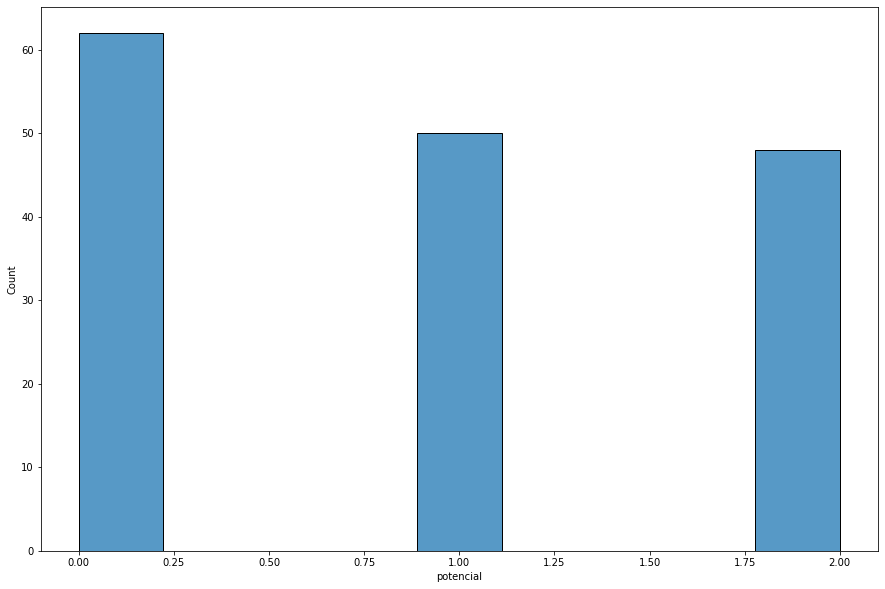

In [81]:
plt.figure(figsize=(15, 10))
sns.histplot(yPotencial)

print(f"Size data: {XPotencial.shape[0]}")

In [82]:
# Apply SMOTE to balance the dataset
oversample = SMOTE()
XPotencial, yPotencial = oversample.fit_resample(XPotencial, yPotencial)

print(f"Size data: {XPotencial.shape[0]}")

Size data: 186


<AxesSubplot:xlabel='potencial', ylabel='Count'>

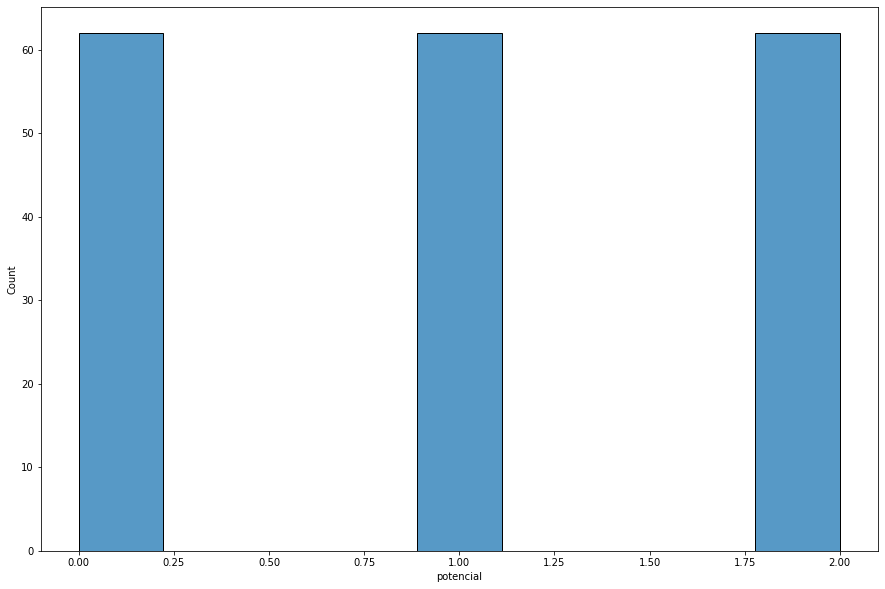

In [83]:
plt.figure(figsize=(15, 10))
sns.histplot(yPotencial)

In [84]:
# Get descriptive statistics
XPotencial.describe().T

count           mean            std      min            25%  \
população     186.0   44852.827325   64426.034657    173.0   13772.565553   
popDe20a24    186.0    3537.238388    5642.384072     17.0    1048.002702   
popDe25a34    186.0    6906.749461    9117.327797     28.0    2260.000000   
popDe35a49    186.0    9258.501775   11668.707572     38.0    2962.610569   
popDe50a59    186.0    5615.127239    7980.496821     10.0    1751.750000   
popMaisDe60   186.0    7808.393478   10121.438962     12.0    2367.000000   
domiciliosA1  186.0     364.299110    1312.482444      0.0       0.000000   
domiciliosA2  186.0     593.563926    1437.728553      0.0       0.000000   
domiciliosB1  186.0    1917.529504    2818.201646      0.0     455.750000   
domiciliosB2  186.0    2513.720863    2798.210690      0.0     849.750000   
domiciliosC1  186.0    3745.611530    4482.183190      5.0    1200.168183   
rendaMedia    186.0    3739.318190    5973.681821    654.0    1518.250000   
faturamento   186.0  871101.030996  435941.116059  24651.0  710653.500000   

                        50%            75%        max  
população      28067.324627   46775.250000   667603.0  
popDe20a24      2232.000000    3649.000000    60567.0  
popDe25a34      4423.539106    7156.500000    86116.0  
popDe35a49      5961.000000    9605.500000   105316.0  
popDe50a59      3624.000000    6358.000000    83341.0  
popMaisDe60     4940.000000    9421.000000    91408.0  
domiciliosA1       0.000000      27.750000    13408.0  
domiciliosA2     115.000000     491.500000    11668.0  
domiciliosB1     964.000000    2087.607819    19350.0  
domiciliosB2    1849.244177    3144.391745    21237.0  
domiciliosC1    2489.873335    4465.000000    33111.0  
rendaMedia      1944.000000    3011.674331    63887.0  
faturamento   827347.500000  958219.126065  2915612.0

In [85]:
# Get descriptive statistics
yPotencial.describe().T

count    186.0000
mean       1.0000
std        0.8187
min        0.0000
25%        0.0000
50%        1.0000
75%        2.0000
max        2.0000
Name: potencial, dtype: float64

In [86]:
# Preview the data
XPotencial.head()

população  popDe20a24  popDe25a34  popDe35a49  popDe50a59  popMaisDe60  \
0    11676.0       800.0      1675.0      2300.0      1784.0       2919.0   
1    27564.0      2630.0      4810.0      5308.0      2403.0       2397.0   
2     9003.0       762.0      1755.0      2076.0      1112.0       1419.0   
3     9606.0       685.0      1317.0      2007.0      1341.0       1986.0   
4    57222.0      4600.0      8660.0     12272.0      7157.0       8190.0   

   domiciliosA1  domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  \
0           0.0         145.0         715.0        1242.0        1093.0   
1           0.0           0.0          82.0         506.0        2040.0   
2           0.0          96.0         404.0         652.0         644.0   
3         114.0         178.0         393.0         517.0         945.0   
4           0.0           0.0        1089.0        2821.0        5110.0   

   rendaMedia  faturamento  
0      2501.0     932515.0  
1       931.0     588833.0  
2      2391.0     874200.0  
3      3727.0     912226.0  
4      1380.0     553020.0

In [87]:
# Preview the data
yPotencial.sample(5)

106    2
142    2
31     0
77     2
128    2
Name: potencial, dtype: int64

## 2.5 Train model

In [88]:
kf = KFold(n_splits=10)


# Define error metrics
def evaluationClassification(model):
    """Evaluate the classification model using cross-validation

    Args:
        model: The model to cross-validation

    Returns:
        Error metrics: Accuracy, balanced Accuracy, f1, precision and recall
    """
    scorMetrics = ('accuracy', 'balanced_accuracy', 'f1_micro',
                   'precision_micro', 'recall_micro')
    cvResults = cross_validate(model, XPotencial, yPotencial,
                                scoring=scorMetrics, cv=kf)

    accuracy = cvResults['test_accuracy']
    balancedAccuracy = cvResults['test_balanced_accuracy']
    f1Micro = cvResults['test_f1_micro']
    precisionMicro = cvResults['test_precision_micro']
    recallMicro = cvResults['test_recall_micro']

    return accuracy, balancedAccuracy, f1Micro, precisionMicro, recallMicro

### 2.5.1 Setup models

In [89]:
# Random Forest Model
clfRF = RandomForestClassifier()

# DecisionTreeClassifier
clfDT = DecisionTreeClassifier()

# KNeighborsClassifier
clfKN = KNeighborsClassifier()

# LinearDiscriminantAnalysis
clfL = LinearDiscriminantAnalysis()

# GaussianNB
clfNB = GaussianNB()

# SVC
clfSVM = SVC()

# XGBClassifier
clfx = XGBClassifier()

# StackingClassifier
sclf = StackingClassifier(classifiers=[clfRF, clfDT, clfKN, clfx],
                          meta_classifier=clfRF)

### 2.5.2 Model Comparison

In [90]:
modelsClassification = pd.DataFrame(columns=["Model", "Accuracy",
                                             "balancedAccuracy", "f1",
                                             "precision", "recall"])

acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfRF)
newRow = {"Model": "clfRF", "Accuracy": acc.mean(), "balancedAccuracy":
           balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfDT)
newRow = {"Model": "clfDT", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfKN)
newRow = {"Model": "clfKN", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfL)
newRow = {"Model": "clfL", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfNB)
newRow = {"Model": "clfNB", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfSVM)
newRow = {"Model": "clfSVM", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(clfx)
newRow = {"Model": "clfx", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)


acc, balancedAccuracy, f1, precision, recall = evaluationClassification(sclf)
newRow = {"Model": "sclf", "Accuracy": acc.mean(),
           "balancedAccuracy": balancedAccuracy.mean(), "f1": f1.mean(),
           "precision": precision.mean(), "recall": recall.mean()}
modelsClassification = modelsClassification.append(newRow, ignore_index=True)

modelsClassification.sort_values(by="Accuracy")

Model  Accuracy balancedAccuracy        f1 precision    recall
5  clfSVM  0.547661         0.546587  0.547661  0.547661  0.547661
4   clfNB  0.591228         0.579177  0.591228  0.591228  0.591228
3    clfL  0.687719         0.710552  0.687719  0.687719  0.687719
2   clfKN  0.719298          0.71484  0.719298  0.719298  0.719298
1   clfDT  0.816667         0.811401  0.816667  0.816667  0.816667
6    clfx   0.89269         0.896983   0.89269   0.89269   0.89269
7    sclf  0.897953         0.900687  0.897953  0.897953  0.897953
0   clfRF  0.914035         0.921347  0.914035  0.914035  0.914035

### 2.5.3 Train Model

In [91]:
clfRF.fit(XPotencial, yPotencial)

RandomForestClassifier()

### 2.5.4 Predict

In [92]:
# Preview the data
dfSP.head()

população  popAte9  popDe10a14  popDe15a19  popDe20a24  popDe25a34  \
0    94034.0  12668.0      6853.0      9836.0      7487.0     14535.0   
1    32791.0   2297.0      1017.0      2096.0      2197.0      5341.0   
2   104193.0  15070.0      7343.0     10631.0      8657.0     17749.0   
3    12721.0    953.0       343.0       627.0       819.0      2142.0   
4    48417.0   5078.0      2396.0      4018.0      3571.0      7388.0   

   popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  domiciliosA2  \
0     21549.0     10598.0      10508.0           0.0         253.0   
1      7281.0      4917.0       7645.0        1413.0        1734.0   
2     23364.0     11567.0       9812.0           0.0           0.0   
3      2833.0      1790.0       3214.0         624.0         667.0   
4     10751.0      6648.0       8567.0           0.0         303.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0        2197.0        4368.0        6681.0        7011.0       2247.0   
1        3704.0        2351.0        1946.0         827.0        291.0   
2        1423.0        4875.0        8595.0       10082.0       3111.0   
3        1558.0        1032.0         915.0         361.0         84.0   
4        1794.0        2986.0        4489.0        2836.0       1104.0   

   domiciliosE  rendaMedia   faturamento potencial  
0       5670.0      1501.0  2.236476e+05       NaN  
1       1617.0      5920.0  1.457812e+06       NaN  
2       5776.0      1284.0  1.439754e+05       NaN  
3        404.0      6278.0  1.248563e+06       NaN  
4       2553.0      1905.0  7.539371e+05       NaN

In [93]:
# Get summary of data frame
dfSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   população     296 non-null    float64
 1   popAte9       296 non-null    float64
 2   popDe10a14    296 non-null    float64
 3   popDe15a19    296 non-null    float64
 4   popDe20a24    296 non-null    float64
 5   popDe25a34    296 non-null    float64
 6   popDe35a49    296 non-null    float64
 7   popDe50a59    296 non-null    float64
 8   popMaisDe60   296 non-null    float64
 9   domiciliosA1  296 non-null    float64
 10  domiciliosA2  296 non-null    float64
 11  domiciliosB1  296 non-null    float64
 12  domiciliosB2  296 non-null    float64
 13  domiciliosC1  296 non-null    float64
 14  domiciliosC2  296 non-null    float64
 15  domiciliosD   296 non-null    float64
 16  domiciliosE   296 non-null    float64
 17  rendaMedia    296 non-null    float64
 18  faturamento   296 non-null    

In [94]:
dfSP.isnull().sum()

população         0
popAte9           0
popDe10a14        0
popDe15a19        0
popDe20a24        0
popDe25a34        0
popDe35a49        0
popDe50a59        0
popMaisDe60       0
domiciliosA1      0
domiciliosA2      0
domiciliosB1      0
domiciliosB2      0
domiciliosC1      0
domiciliosC2      0
domiciliosD       0
domiciliosE       0
rendaMedia        0
faturamento       0
potencial       296
dtype: int64

In [95]:
# Get feature to predict and drop potencial
importantFeaturesPotencial.remove('potencial')
print(importantFeaturesPotencial)
dfSPFeatures = dfSP[importantFeaturesPotencial]

# Preview the data
dfSPFeatures.sample(5)

['população', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'rendaMedia', 'faturamento']


população  popDe20a24  popDe25a34  popDe35a49  popDe50a59  popMaisDe60  \
154    43550.0      2772.0      6921.0      9593.0      6242.0      10878.0   
68      4099.0       261.0       746.0      1043.0       448.0        634.0   
138    11416.0       560.0      1499.0      2497.0      1716.0       3388.0   
66     30584.0      3466.0      6581.0      6556.0      4076.0       6224.0   
37     50281.0      3665.0      7181.0     11456.0      6749.0       9431.0   

     domiciliosA1  domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  \
154        1766.0        2277.0        4815.0        3438.0        2933.0   
68           49.0         107.0         286.0         277.0         230.0   
138        1202.0         588.0        1007.0         520.0         353.0   
66         1102.0        1663.0        4513.0        3041.0        2541.0   
37            0.0         160.0        2659.0        3792.0        3816.0   

     rendaMedia   faturamento  
154      5490.0  1.599161e+06  
68       3382.0  9.035629e+05  
138     11135.0  1.309081e+06  
66       5516.0  1.495438e+06  
37       2048.0  8.496007e+05

In [96]:
potencialSP = clfRF.predict(dfSPFeatures)
potencialSP[:5]

array([2, 2, 1, 1, 2])

In [97]:
dfSP['potencial'] = potencialSP
dfSPFull['potencial'] = potencialSP

# Preview the data
dfSPFull.head(5)

codigo            nome     cidade estado  população  popAte9  \
0  355030251.0  A. E. Carvalho  São Paulo     SP    94034.0  12668.0   
1   35503020.0       Aclimação  São Paulo     SP    32791.0   2297.0   
2  355030285.0      Adventista  São Paulo     SP   104193.0  15070.0   
3   35503088.0     Água Branca  São Paulo     SP    12721.0    953.0   
4   35503066.0      Água Funda  São Paulo     SP    48417.0   5078.0   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
0      6853.0      9836.0      7487.0     14535.0  ...         253.0   
1      1017.0      2096.0      2197.0      5341.0  ...        1734.0   
2      7343.0     10631.0      8657.0     17749.0  ...           0.0   
3       343.0       627.0       819.0      2142.0  ...         667.0   
4      2396.0      4018.0      3571.0      7388.0  ...         303.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0        2197.0        4368.0        6681.0        7011.0       2247.0   
1        3704.0        2351.0        1946.0         827.0        291.0   
2        1423.0        4875.0        8595.0       10082.0       3111.0   
3        1558.0        1032.0         915.0         361.0         84.0   
4        1794.0        2986.0        4489.0        2836.0       1104.0   

   domiciliosE  rendaMedia   faturamento  potencial  
0       5670.0      1501.0  2.236476e+05          2  
1       1617.0      5920.0  1.457812e+06          2  
2       5776.0      1284.0  1.439754e+05          1  
3        404.0      6278.0  1.248563e+06          1  
4       2553.0      1905.0  7.539371e+05          2  

[5 rows x 24 columns]

In [98]:
# Convert numeric to categorical
dfSPFull['potencial'].replace(to_replace=[0, 1, 2],
                              value=['Baixo', 'Médio', 'Alto'],
                              inplace=True)

# Preview the data
dfSPFull.head(5)

codigo            nome     cidade estado  população  popAte9  \
0  355030251.0  A. E. Carvalho  São Paulo     SP    94034.0  12668.0   
1   35503020.0       Aclimação  São Paulo     SP    32791.0   2297.0   
2  355030285.0      Adventista  São Paulo     SP   104193.0  15070.0   
3   35503088.0     Água Branca  São Paulo     SP    12721.0    953.0   
4   35503066.0      Água Funda  São Paulo     SP    48417.0   5078.0   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosA2  \
0      6853.0      9836.0      7487.0     14535.0  ...         253.0   
1      1017.0      2096.0      2197.0      5341.0  ...        1734.0   
2      7343.0     10631.0      8657.0     17749.0  ...           0.0   
3       343.0       627.0       819.0      2142.0  ...         667.0   
4      2396.0      4018.0      3571.0      7388.0  ...         303.0   

   domiciliosB1  domiciliosB2  domiciliosC1  domiciliosC2  domiciliosD  \
0        2197.0        4368.0        6681.0        7011.0       2247.0   
1        3704.0        2351.0        1946.0         827.0        291.0   
2        1423.0        4875.0        8595.0       10082.0       3111.0   
3        1558.0        1032.0         915.0         361.0         84.0   
4        1794.0        2986.0        4489.0        2836.0       1104.0   

   domiciliosE  rendaMedia   faturamento  potencial  
0       5670.0      1501.0  2.236476e+05       Alto  
1       1617.0      5920.0  1.457812e+06       Alto  
2       5776.0      1284.0  1.439754e+05      Médio  
3        404.0      6278.0  1.248563e+06      Médio  
4       2553.0      1905.0  7.539371e+05       Alto  

[5 rows x 24 columns]

### 2.5.5 New infos to Insights

In [99]:
# Creat new row with people of age fom 25 to 49 to each neighborhood
dfSPFull['populacaoObjetivoSize'] = dfSPFull.popDe25a34 + dfSPFull.popDe35a49

# Creat new row with houses A and B size to each neighborhood
dfSPFull['domicilioObjetivoSize'] = dfSPFull.domiciliosA1 +\
                                    dfSPFull.domiciliosA2 +\
                                    dfSPFull.domiciliosB1 +\
                                    dfSPFull.domiciliosB2

# Preview the data
dfSPFull.head(5)

codigo            nome     cidade estado  população  popAte9  \
0  355030251.0  A. E. Carvalho  São Paulo     SP    94034.0  12668.0   
1   35503020.0       Aclimação  São Paulo     SP    32791.0   2297.0   
2  355030285.0      Adventista  São Paulo     SP   104193.0  15070.0   
3   35503088.0     Água Branca  São Paulo     SP    12721.0    953.0   
4   35503066.0      Água Funda  São Paulo     SP    48417.0   5078.0   

   popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosB2  \
0      6853.0      9836.0      7487.0     14535.0  ...        4368.0   
1      1017.0      2096.0      2197.0      5341.0  ...        2351.0   
2      7343.0     10631.0      8657.0     17749.0  ...        4875.0   
3       343.0       627.0       819.0      2142.0  ...        1032.0   
4      2396.0      4018.0      3571.0      7388.0  ...        2986.0   

   domiciliosC1  domiciliosC2  domiciliosD  domiciliosE  rendaMedia  \
0        6681.0        7011.0       2247.0       5670.0      1501.0   
1        1946.0         827.0        291.0       1617.0      5920.0   
2        8595.0       10082.0       3111.0       5776.0      1284.0   
3         915.0         361.0         84.0        404.0      6278.0   
4        4489.0        2836.0       1104.0       2553.0      1905.0   

    faturamento  potencial  populacaoObjetivoSize  domicilioObjetivoSize  
0  2.236476e+05       Alto                36084.0                 6818.0  
1  1.457812e+06       Alto                12622.0                 9202.0  
2  1.439754e+05      Médio                41113.0                 6298.0  
3  1.248563e+06      Médio                 4975.0                 3881.0  
4  7.539371e+05       Alto                18139.0                 5083.0  

[5 rows x 26 columns]

# 3 . Insights

<AxesSubplot:xlabel='faturamento', ylabel='Count'>

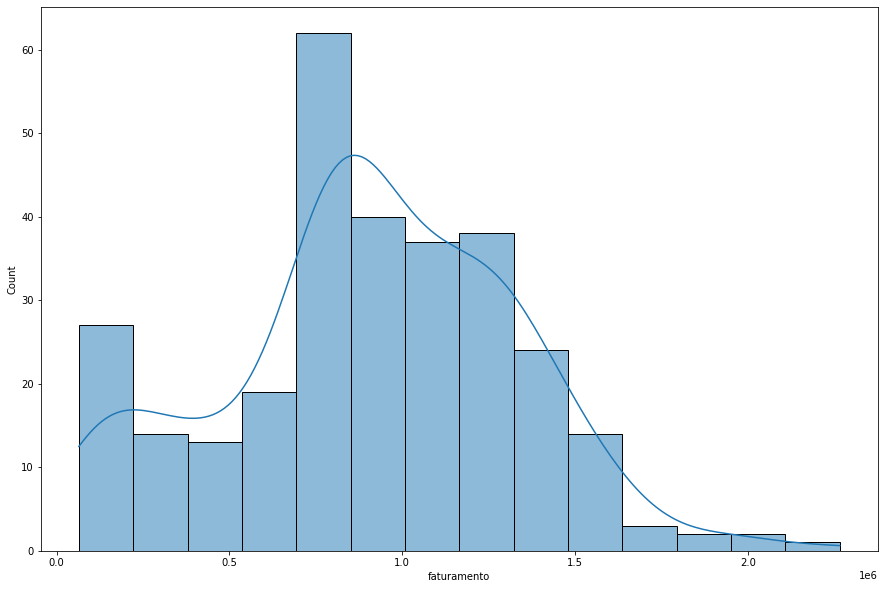

In [100]:
# Plot faturamento SP
plt.figure(figsize=(15, 10))
sns.histplot(dfSPFull['faturamento'], kde=True)

<AxesSubplot:xlabel='potencial', ylabel='Count'>

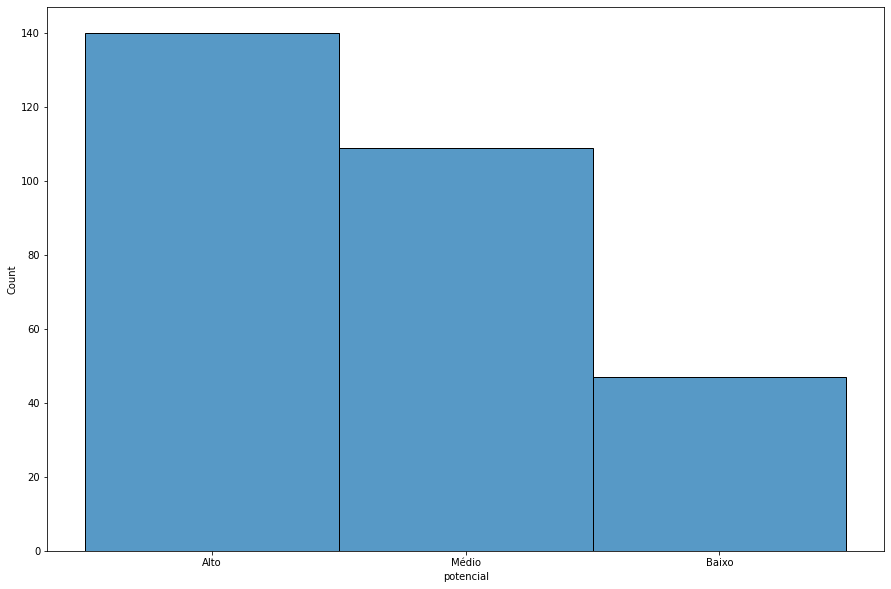

In [101]:
plt.figure(figsize=(15, 10))
sns.histplot(dfSPFull['potencial'])

<AxesSubplot:title={'center':'Distribuição de bairros por potencial'}, ylabel='Potencial'>

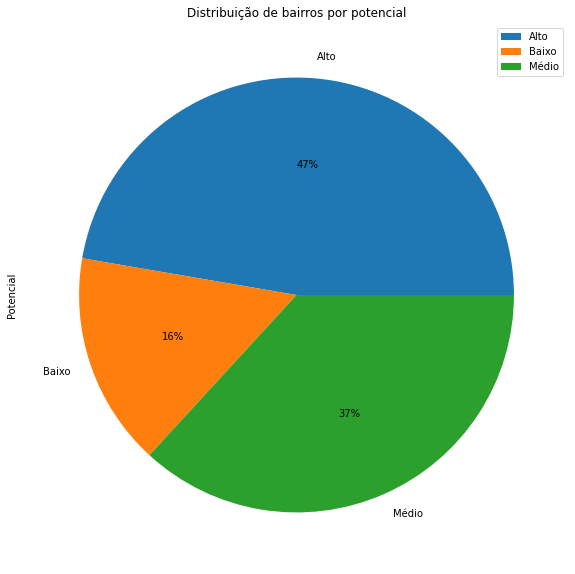

In [102]:
dfSPFull.groupby(['potencial']).count().plot(figsize=(15, 10),
                                             kind='pie', y='codigo',
                                             autopct='%1.0f%%',
                                             ylabel='Potencial',
                                             title='Distribuição de bairros por potencial')

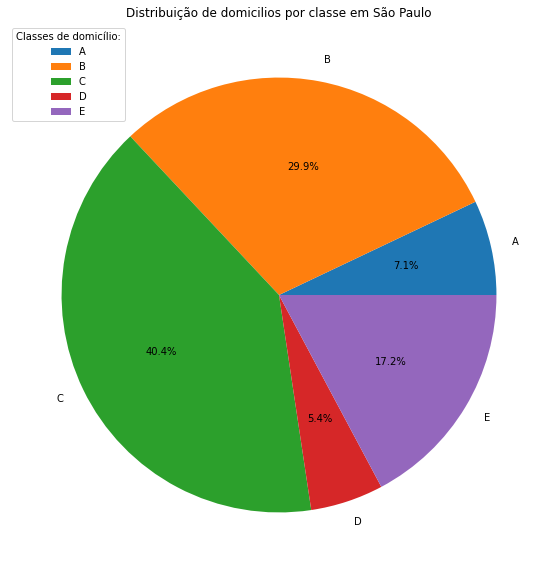

In [103]:
domiciliosA1 = dfSPFull.domiciliosA1.sum()
domiciliosA2 = dfSPFull.domiciliosA2.sum()
domiciliosB1 = dfSPFull.domiciliosB1.sum()
domiciliosB2 = dfSPFull.domiciliosB2.sum()
domiciliosC1 = dfSPFull.domiciliosC1.sum()
domiciliosC2 = dfSPFull.domiciliosC2.sum()
domiciliosD = dfSPFull.domiciliosD.sum()
domiciliosE = dfSPFull.domiciliosE.sum()

dfDomicilios = pd.DataFrame({'domicilios': ['A', 'B', 'C', 'D', 'E'],
                             'Quantidade': [domiciliosA1 + domiciliosA2,
                                            domiciliosB1 + domiciliosB2,
                                            domiciliosC1 + domiciliosC2,
                                            domiciliosD, domiciliosE]})

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Distribuição de domicilios por classe em São Paulo')
plt.pie(dfDomicilios['Quantidade'], labels=['A', 'B', 'C', 'D', 'E'],
        autopct='%1.1f%%', )
ax.legend(title="Classes de domicílio:")

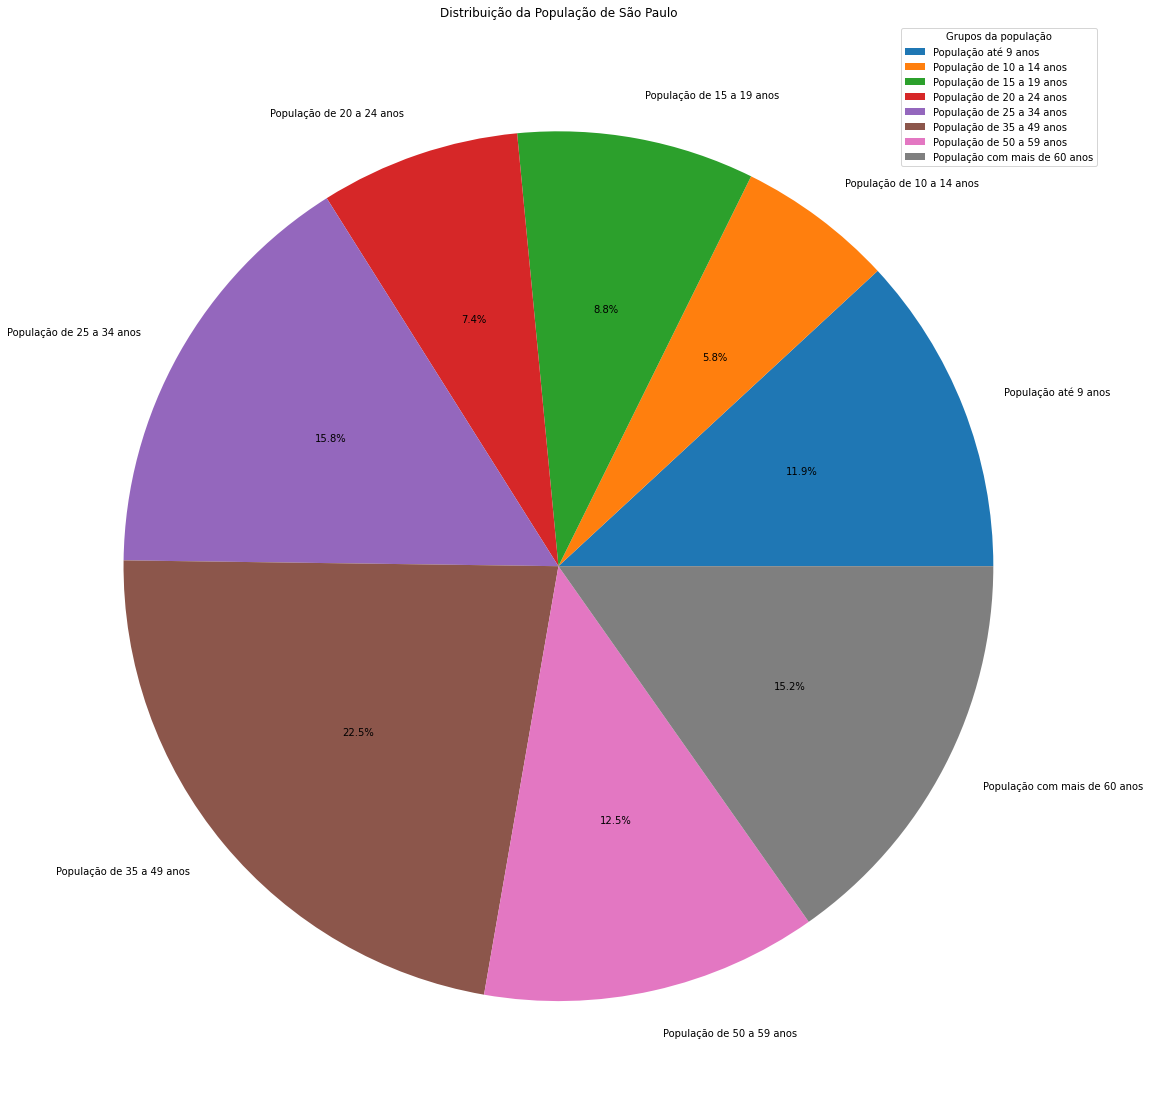

In [104]:
popAte9 = dfSPFull['popAte9'].sum()
pop10a14 = dfSPFull['popDe10a14'].sum()
pop15a19 = dfSPFull['popDe15a19'].sum()
pop20a24 = dfSPFull['popDe20a24'].sum()
pop25a34 = dfSPFull['popDe25a34'].sum()
pop35a49 = dfSPFull['popDe35a49'].sum()
pop50a59 = dfSPFull['popDe50a59'].sum()
popMaisDe60 = dfSPFull['popMaisDe60'].sum()

dfPopulacao = pd.DataFrame({'domicilios': ['População até 9 anos',
                                           'População de 10 a 14 anos',
                                           'População de 15 a 19 anos',
                                           'População de 20 a 24 anos',
                                           'População de 25 a 34 anos',
                                           'População de 35 a 49 anos',
                                           'População de 50 a 59 anos',
                                           'População com mais de 60 anos'],
                            'Quantidade': [popAte9, pop10a14, pop15a19,
                                           pop20a24, pop25a34, pop35a49,
                                           pop50a59, popMaisDe60]
                            })

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Distribuição da População de São Paulo')
plt.pie(dfPopulacao['Quantidade'], labels=dfPopulacao['domicilios'],
        autopct='%1.1f%%')
ax.legend(title="Grupos da população")

In [105]:
file = 'shapefile/DEINFO_DISTRITO.shp'
neighborhoodSP = geopandas.read_file(file)
neighborhoodSP

CLASSID     FEATID  REVISIONNU       NOME_DIST SIGLA_DIST COD_DIST  \
0       4.0  8583485.0         1.0  JOSE BONIFACIO        JBO       47   
1       4.0  8583484.0         1.0     JD SAO LUIS        JDS       46   
2       4.0  8583445.0         1.0     ARTUR ALVIM        AAL        5   
3       4.0  8583479.0         1.0         JAGUARA        JAG       40   
4       4.0  8583437.0         1.0   VILA PRUDENTE        VPR       93   
..      ...        ...         ...             ...        ...      ...   
91      4.0  8583433.0         1.0      VILA MARIA        VMR       89   
92      4.0  8583434.0         1.0    VILA MARIANA        VMN       90   
93      4.0  8583435.0         1.0    VILA MATILDE        VMT       91   
94      4.0  8583412.0         1.0   SANTA CECILIA        SCE       69   
95      4.0  8583409.0         1.0       REPUBLICA        REP       66   

   COD_SUB  DATA_CRIAC  USUARIO_ID  \
0       27  2007-03-19         0.0   
1       18  2007-03-19         0.0   
2       21  2007-03-19         0.0   
3       08  2007-03-19         0.0   
4       29  2007-03-19         0.0   
..     ...         ...         ...   
91      07  2007-03-19         0.0   
92      12  2007-03-19         0.0   
93      21  2007-03-19         0.0   
94      09  2007-03-19         0.0   
95      09  2007-03-19         0.0   

                                             geometry  
0   POLYGON ((352436.869 7394174.148, 352450.740 7...  
1   POLYGON ((320696.639 7383620.282, 320699.486 7...  
2   POLYGON ((349461.276 7397764.525, 349461.935 7...  
3   POLYGON ((320731.080 7400614.592, 320732.386 7...  
4   POLYGON ((338651.039 7392203.484, 338654.034 7...  
..                                                ...  
91  POLYGON ((338228.823 7397145.610, 338216.895 7...  
92  POLYGON ((331606.384 7389277.797, 331607.340 7...  
93  POLYGON ((341994.993 7396441.620, 341979.394 7...  
94  POLYGON ((330220.609 7396091.962, 330226.819 7...  
95  POLYGON ((331990.790 7395882.037, 332014.420 7...  

[96 rows x 10 columns]

In [106]:
dfSPFull['nomeProcessado'] = dfSPFull['nome']

for idx in range(len(dfSPFull)):
    textName = unidecode(dfSPFull['nomeProcessado'][idx].upper(), "utf-8")
    dfSPFull['nomeProcessado'][idx] = unidecode(textName)

dfSPFull.sample(5)

codigo                  nome     cidade estado  população  popAte9  \
114  355030262.0  Jardim Das Oliveiras  São Paulo     SP    81544.0  11693.0   
199   35503081.0              Perdizes  São Paulo     SP    47046.0   3544.0   
167  355030234.0    Palmas Do Tremembé  São Paulo     SP    32280.0   3709.0   
44    35503091.0       Casa Verde Alta  São Paulo     SP    77356.0   8177.0   
274  355030102.0            Vila Maria  São Paulo     SP    16754.0   1519.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
114      6057.0      9203.0      6634.0     12415.0  ...        5973.0   
199      1505.0      2618.0      2762.0      7563.0  ...        1602.0   
167      1858.0      2743.0      2271.0      4684.0  ...        2353.0   
44       3902.0      6256.0      5582.0     11741.0  ...        5681.0   
274       680.0      1164.0      1254.0      2350.0  ...        1299.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia   faturamento  \
114        6891.0       2277.0       6097.0      1147.0  1.930242e+05   
199         537.0          0.0       1393.0      8707.0  2.027563e+06   
167        2183.0        488.0       1897.0      2267.0  7.746403e+05   
44         4438.0       1152.0       3779.0      2297.0  9.698333e+05   
274        1088.0        209.0       1217.0      2117.0  8.476583e+05   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
114      Médio                30681.0                 3799.0   
199       Alto                18203.0                16520.0   
167      Médio                11670.0                 3529.0   
44        Alto                28382.0                10915.0   
274      Médio                 5972.0                 2109.0   

           nomeProcessado  
114  JARDIM DAS OLIVEIRAS  
199              PERDIZES  
167    PALMAS DO TREMEMBE  
44        CASA VERDE ALTA  
274            VILA MARIA  

[5 rows x 27 columns]

In [107]:
# Create dict to start the geoDataframe with essencial info to plot
dfMunicipios = {'bairro': [], 'potencial': [], 'população': [],
                'faturamento': [], 'geometry': [], 'populacaoObjetivoSize': [],
                'domicilioObjetivoSize': [], 'rendaMedia': []}

for idx, bairro in enumerate(neighborhoodSP['NOME_DIST']):
    bairro = bairro.replace('JD ', 'JARDIM ').replace('CID', 'CIDADE')
    dfMunicipios['bairro'].append(bairro)
    dfMunicipios['geometry'].append(neighborhoodSP['geometry'][idx])

    if len(dfSPFull[dfSPFull['nomeProcessado'] == bairro]) > 0:
        values = dfSPFull[dfSPFull['nomeProcessado'] == bairro]
        dfMunicipios['potencial'].append(values['potencial'].iloc[0])
        dfMunicipios['população'].append(values['população'].iloc[0])
        dfMunicipios['faturamento'].append(values['faturamento'].iloc[0])
        dfMunicipios['populacaoObjetivoSize'].append(values['populacaoObjetivoSize'].iloc[0])
        dfMunicipios['domicilioObjetivoSize'].append(values['domicilioObjetivoSize'].iloc[0])
        dfMunicipios['rendaMedia'].append(values['rendaMedia'].iloc[0])
    elif dfSPFull['nomeProcessado'].str.contains(bairro).sum() == 1:
        values = dfSPFull[dfSPFull['nomeProcessado'].str.contains(bairro)]
        dfMunicipios['potencial'].append(values['potencial'].iloc[0])
        dfMunicipios['população'].append(values['população'].iloc[0])
        dfMunicipios['faturamento'].append(values['faturamento'].iloc[0])
        dfMunicipios['populacaoObjetivoSize'].append(values['populacaoObjetivoSize'].iloc[0])
        dfMunicipios['domicilioObjetivoSize'].append(values['domicilioObjetivoSize'].iloc[0])
        dfMunicipios['rendaMedia'].append(values['rendaMedia'].iloc[0])
    else:
        dfMunicipios['potencial'].append(None)
        dfMunicipios['população'].append(None)
        dfMunicipios['faturamento'].append(None)
        dfMunicipios['populacaoObjetivoSize'].append(None)
        dfMunicipios['domicilioObjetivoSize'].append(None)
        dfMunicipios['rendaMedia'].append(None)

dfMunicipios = geopandas.GeoDataFrame(dfMunicipios)

In [108]:
dfMunicipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bairro                 96 non-null     object  
 1   potencial              87 non-null     object  
 2   população              87 non-null     float64 
 3   faturamento            87 non-null     float64 
 4   geometry               96 non-null     geometry
 5   populacaoObjetivoSize  87 non-null     float64 
 6   domicilioObjetivoSize  87 non-null     float64 
 7   rendaMedia             87 non-null     float64 
dtypes: float64(5), geometry(1), object(2)
memory usage: 6.1+ KB


In [109]:
dfSPFull.shape

(296, 27)

Text(0.5, 1.0, 'Distribuição do potencial dos Bairros de SP')

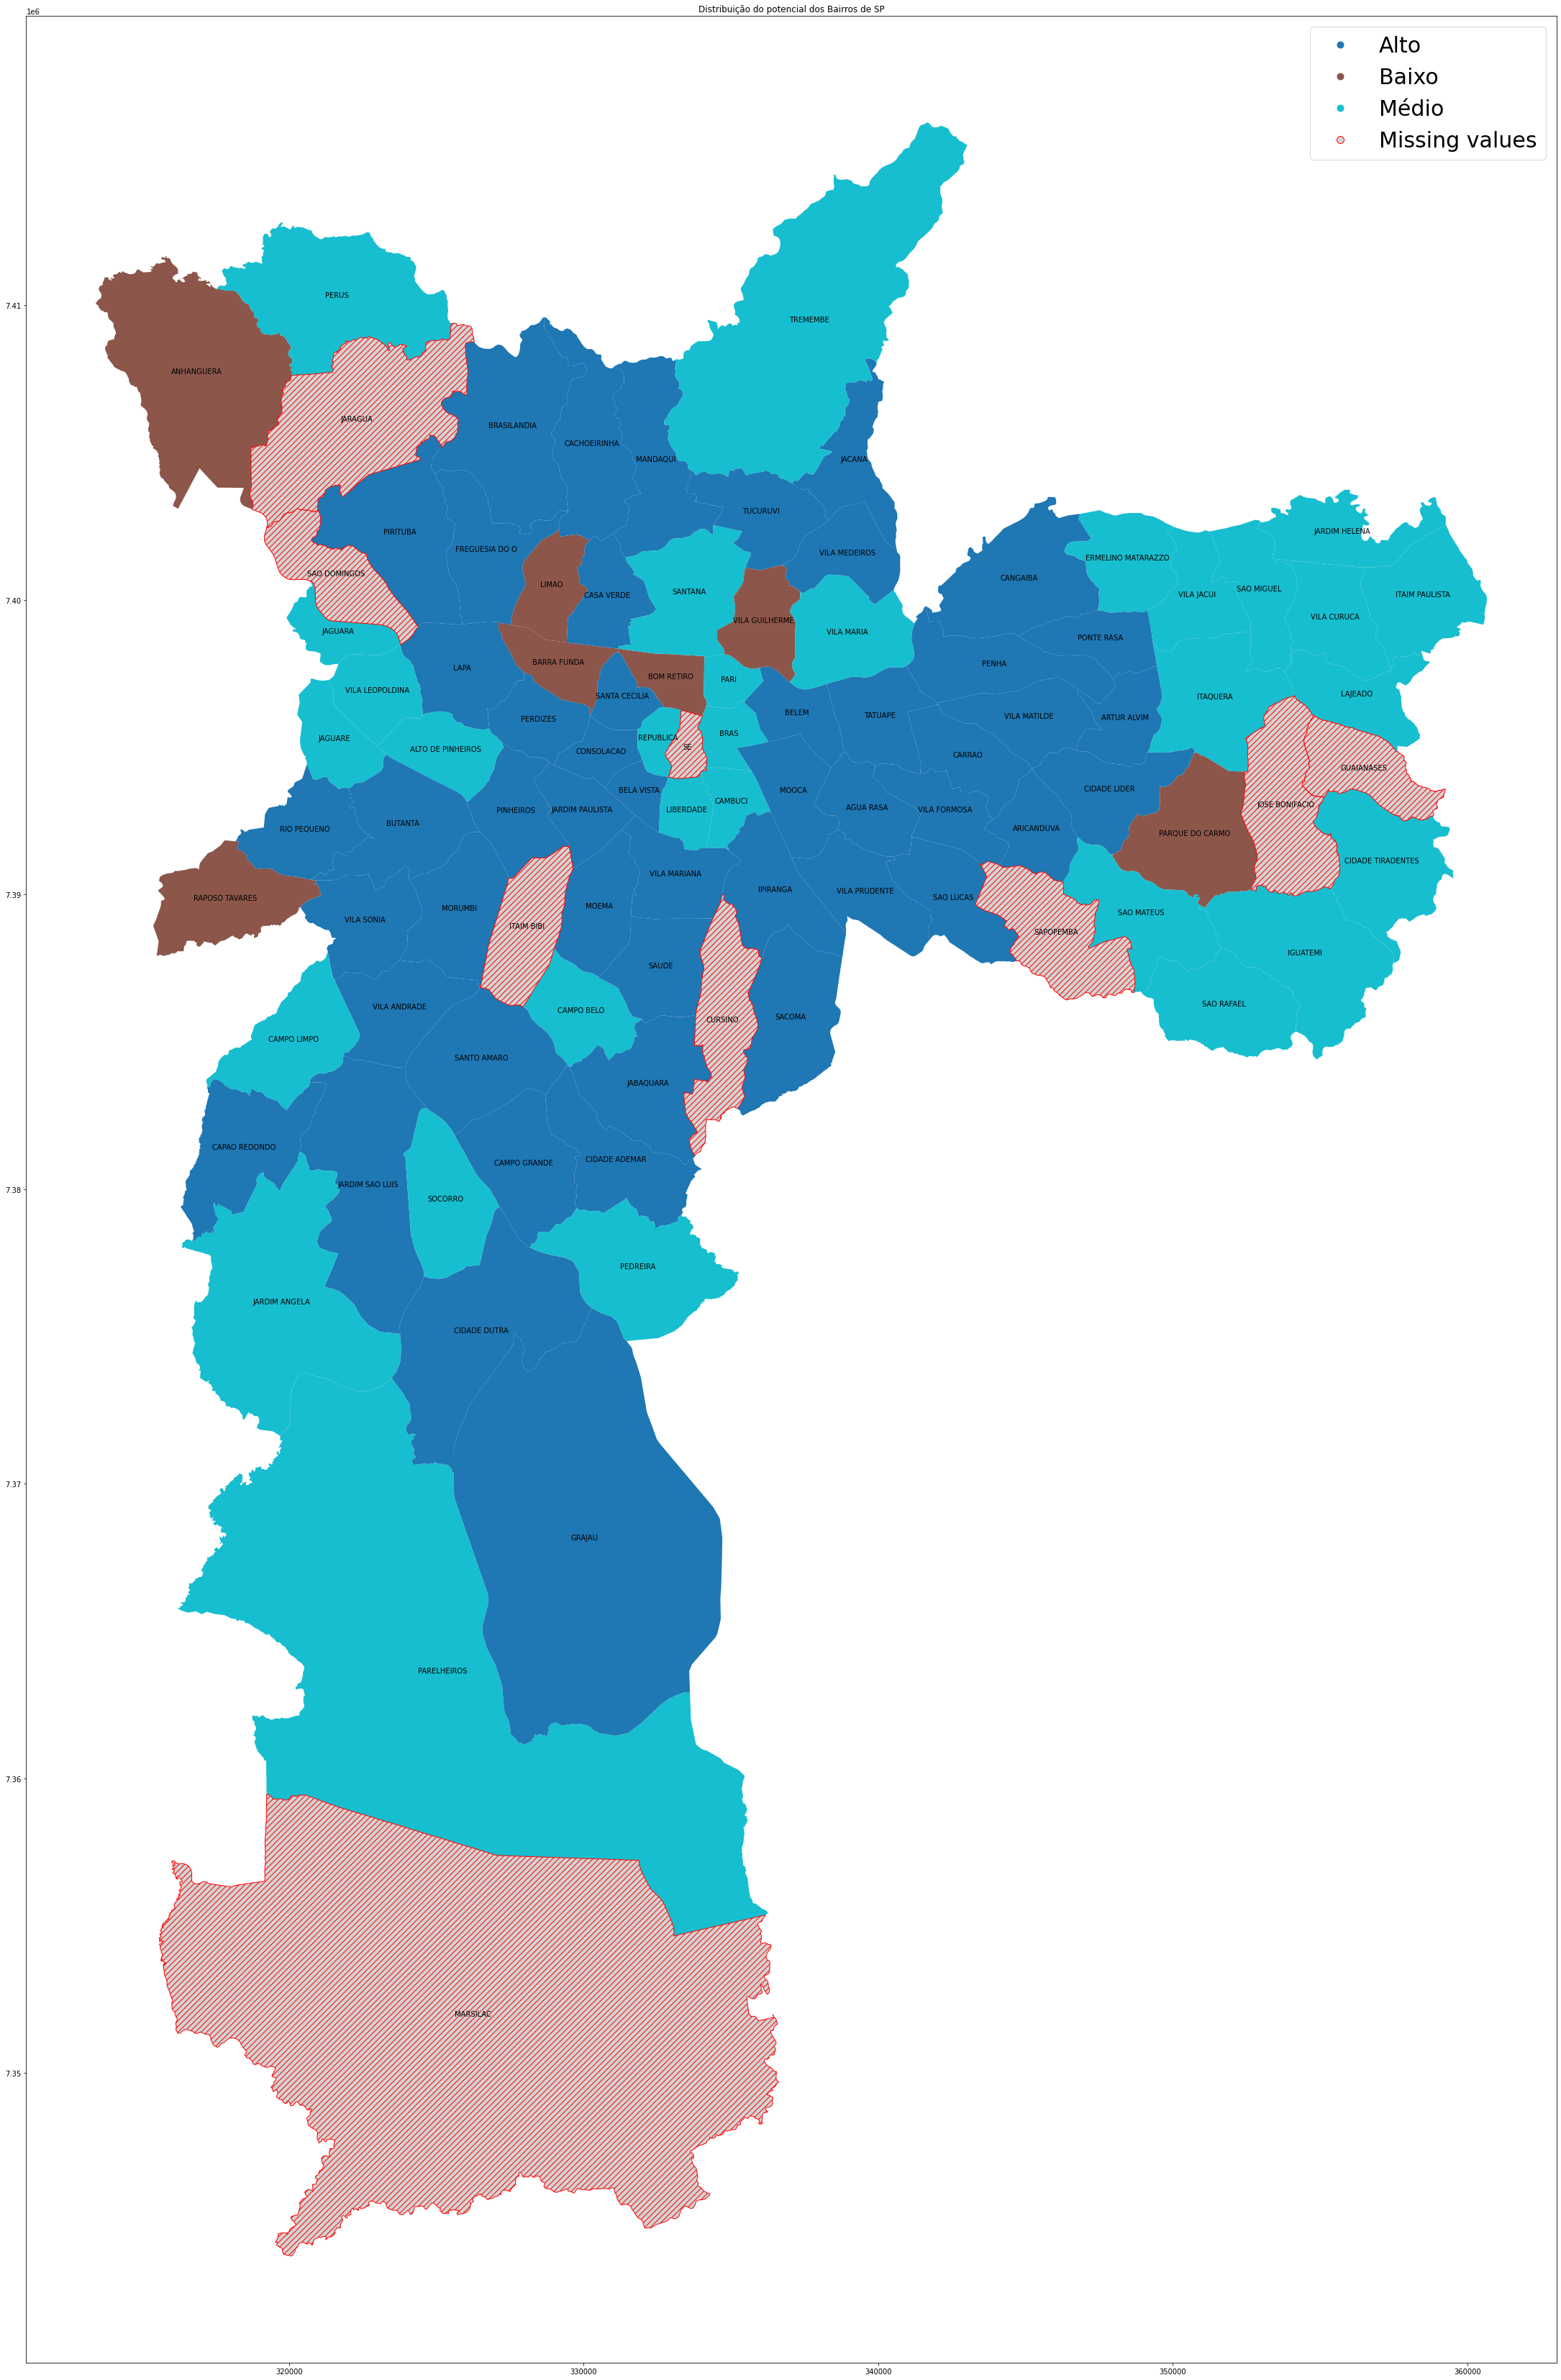

In [110]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="potencial", legend=True, legend_kwds={'fontsize':30},
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)
plt.title('Distribuição do potencial dos Bairros de SP')

0     Annotation(353834, 7.39298e+06, 'JOSE BONIFACIO')
1     Annotation(322676, 7.38008e+06, 'JARDIM SAO LU...
2        Annotation(348378, 7.39594e+06, 'ARTUR ALVIM')
3            Annotation(321658, 7.39887e+06, 'JAGUARA')
4      Annotation(339562, 7.39005e+06, 'VILA PRUDENTE')
                            ...                        
91        Annotation(338955, 7.39885e+06, 'VILA MARIA')
92      Annotation(333123, 7.39064e+06, 'VILA MARIANA')
93        Annotation(345103, 7.396e+06, 'VILA MATILDE')
94     Annotation(331311, 7.39668e+06, 'SANTA CECILIA')
95         Annotation(332534, 7.39526e+06, 'REPUBLICA')
Length: 96, dtype: object

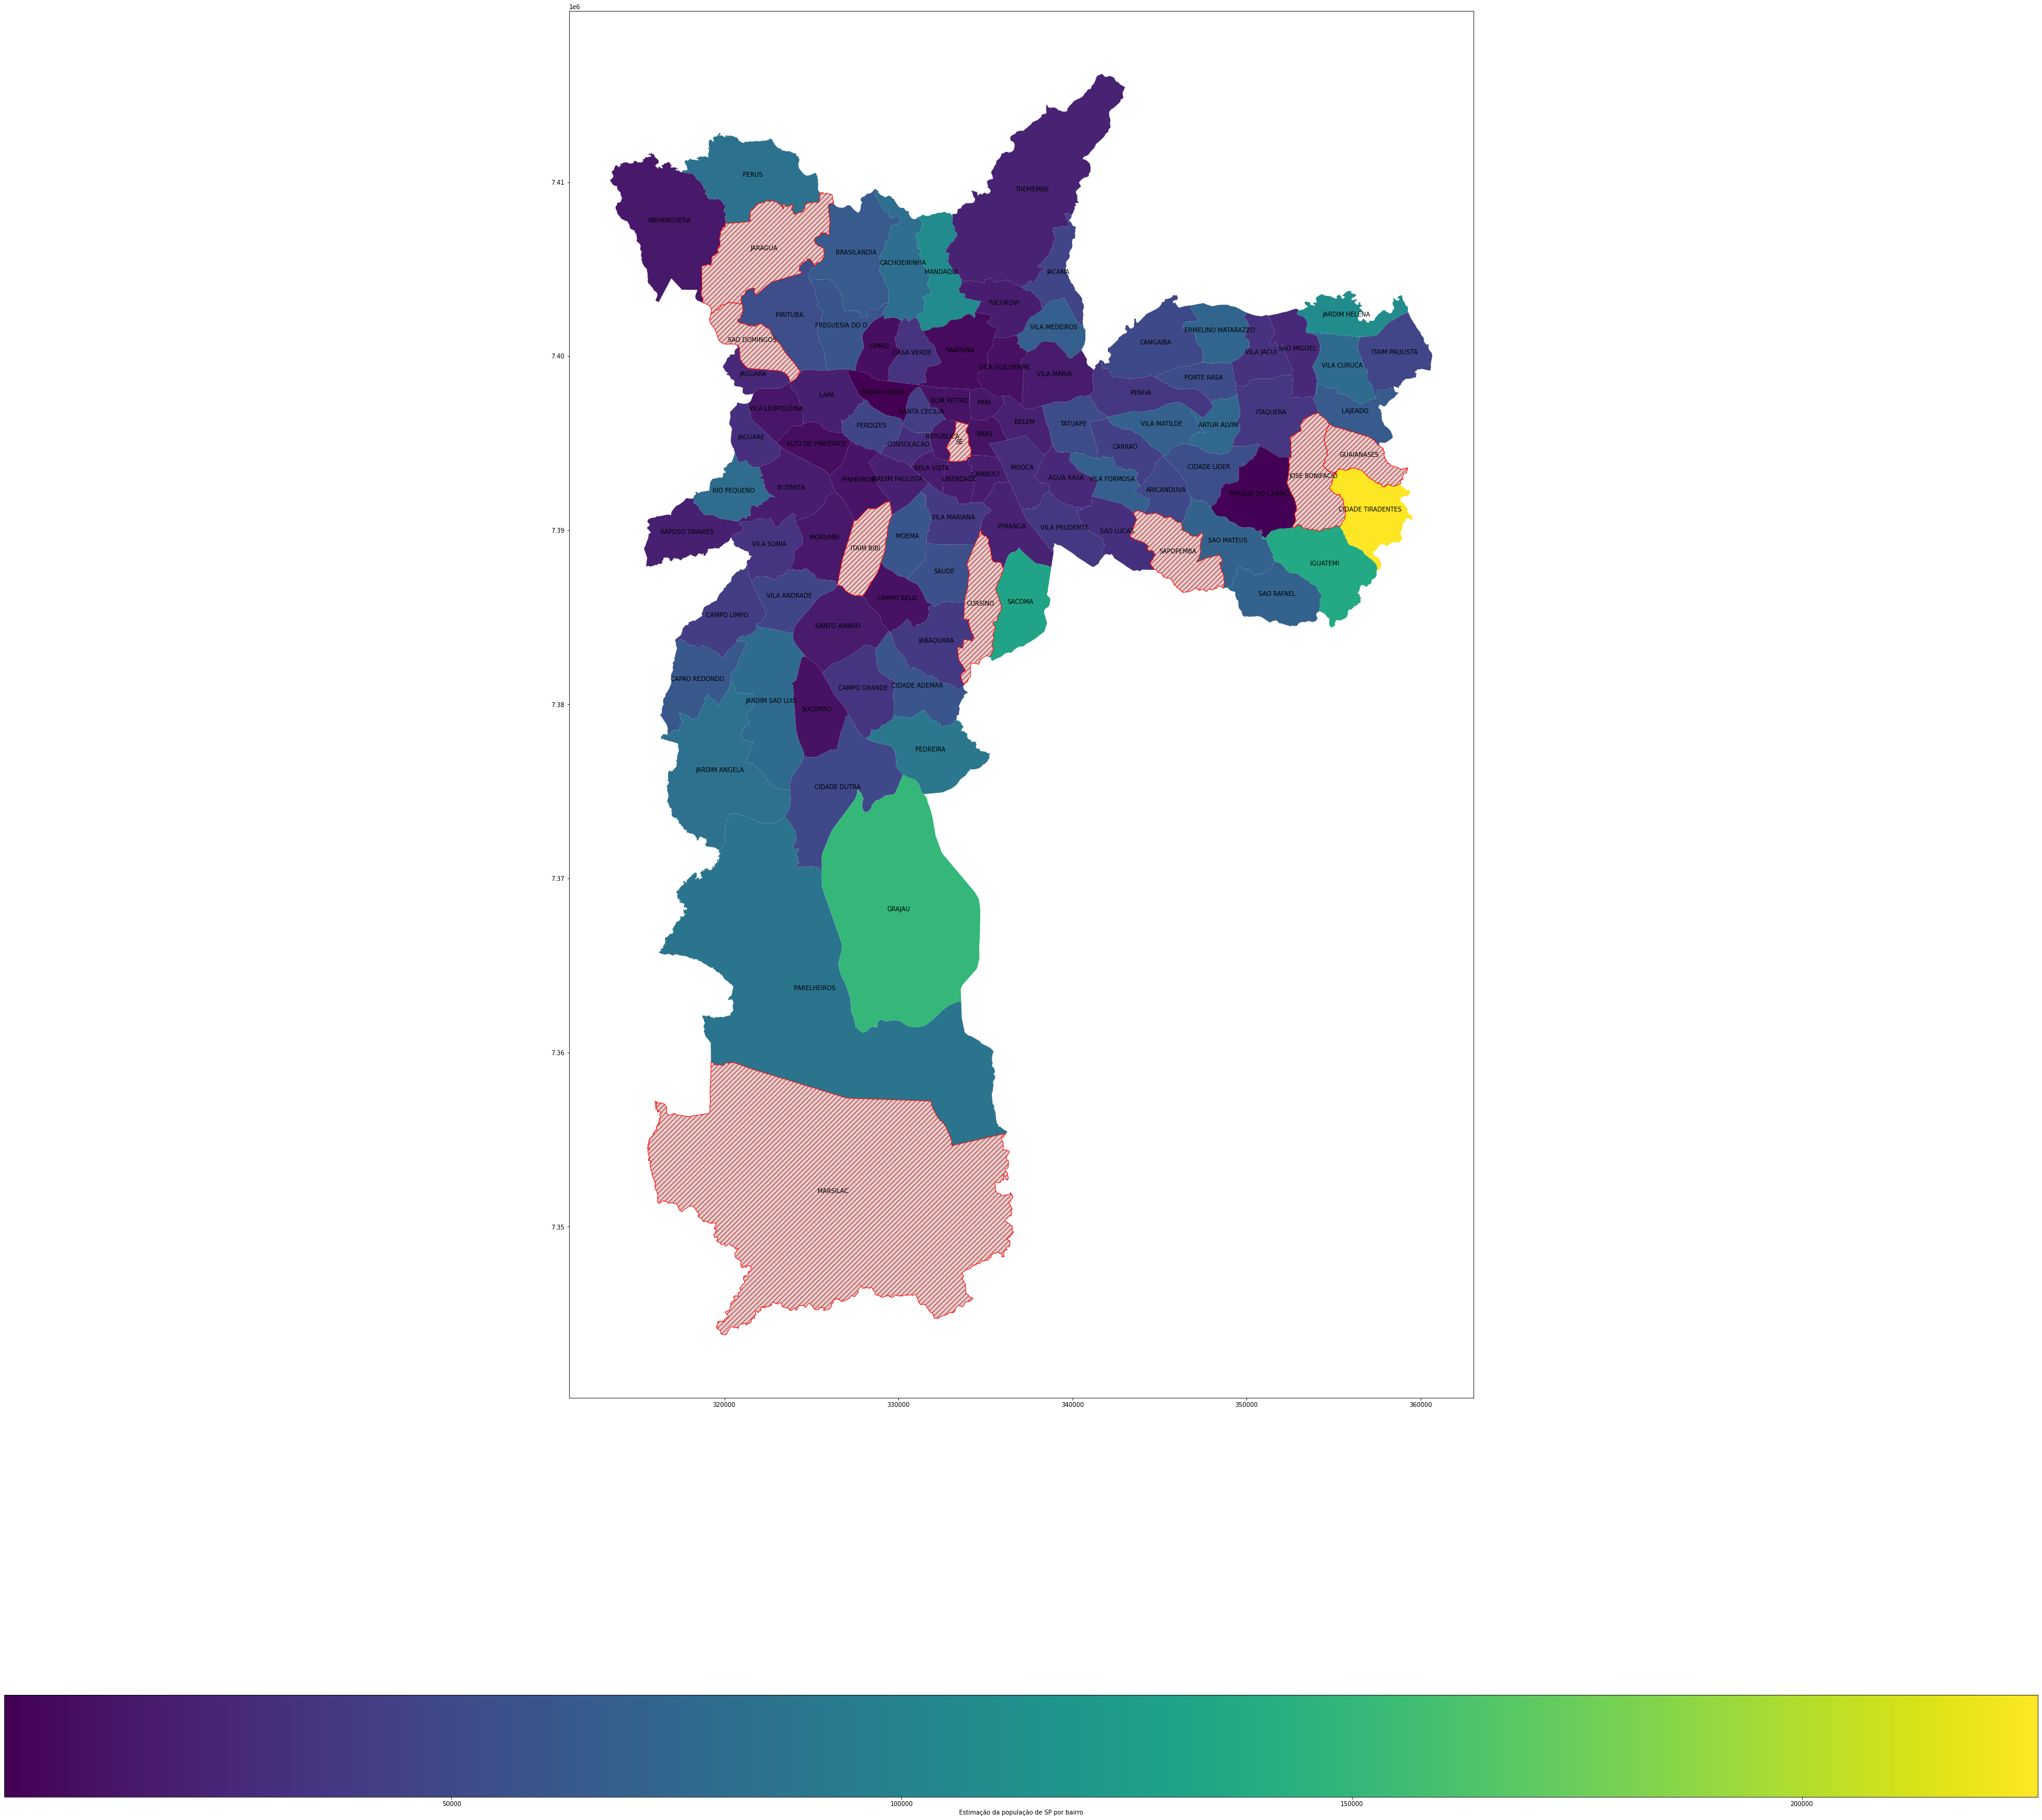

In [111]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="população", legend=True,
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"},
                  legend_kwds={"label": "Estimação da população de SP por bairro",
                               "orientation": "horizontal"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)

Text(0.5, 1.0, 'Distribuição do faturamento dos Bairros de SP')

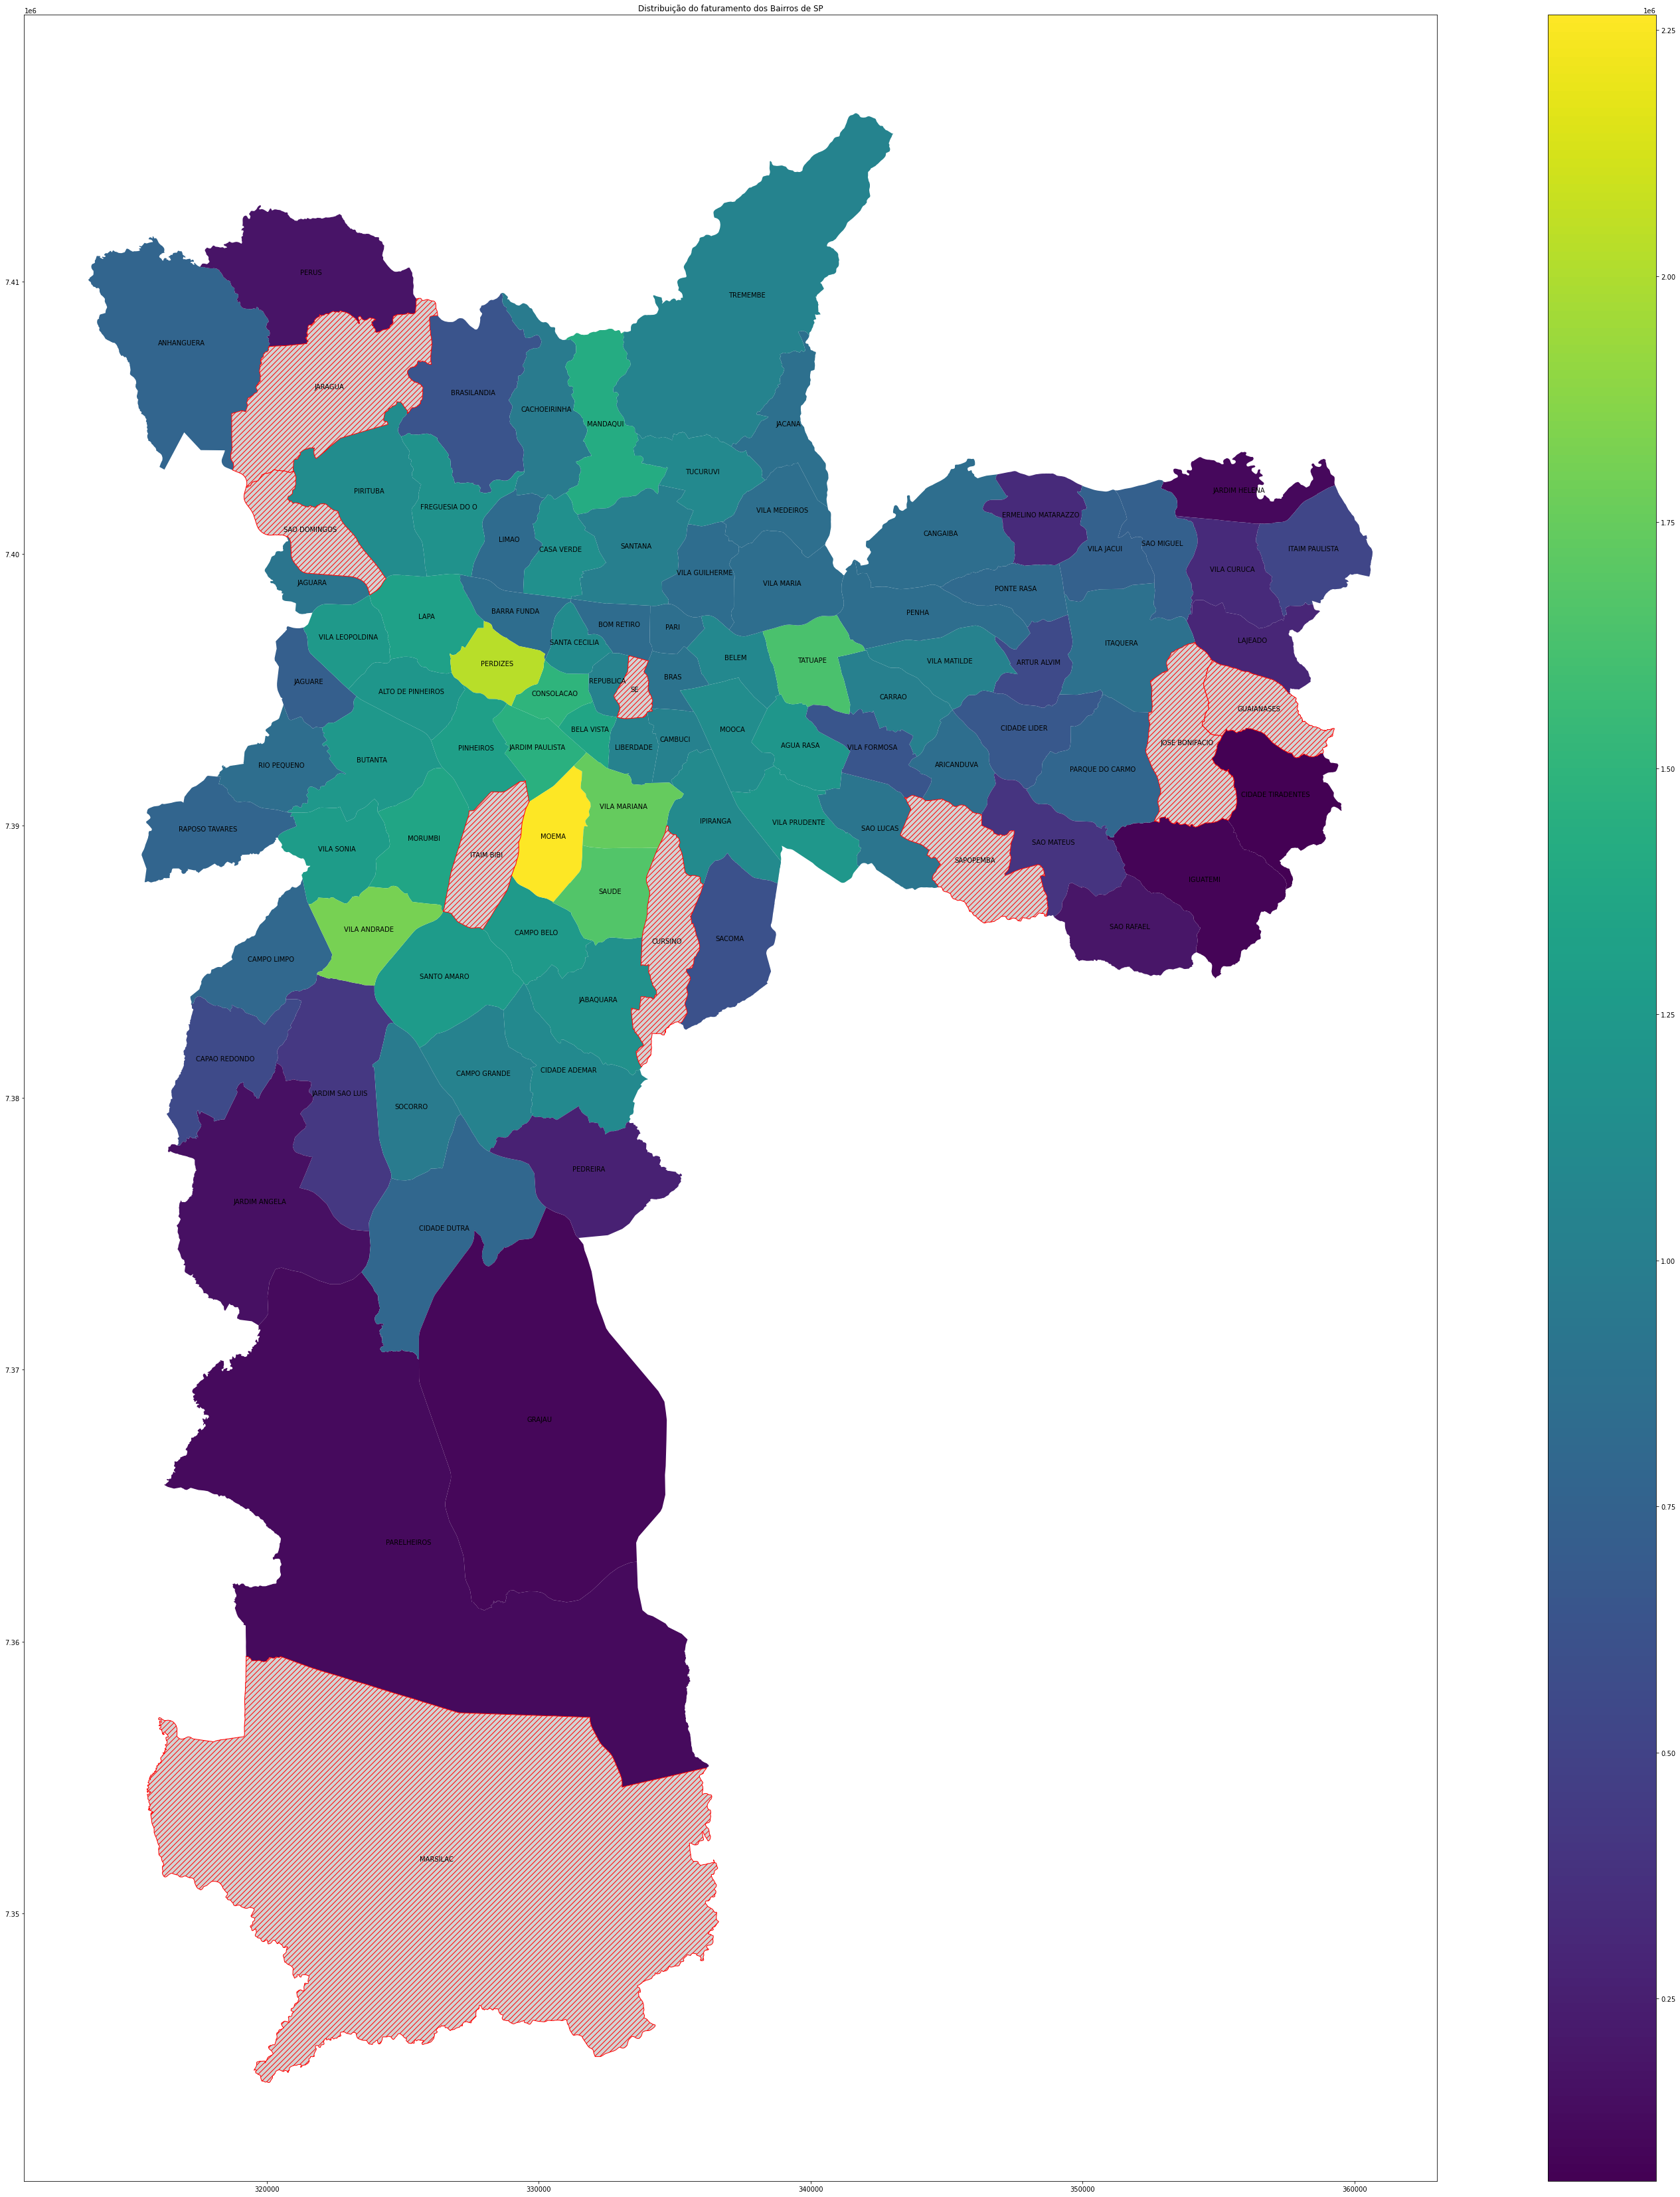

In [112]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="faturamento", legend=True,
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)
plt.title('Distribuição do faturamento dos Bairros de SP')

Text(0.5, 1.0, 'Distribuição de domicílios A e B dos Bairros de SP')

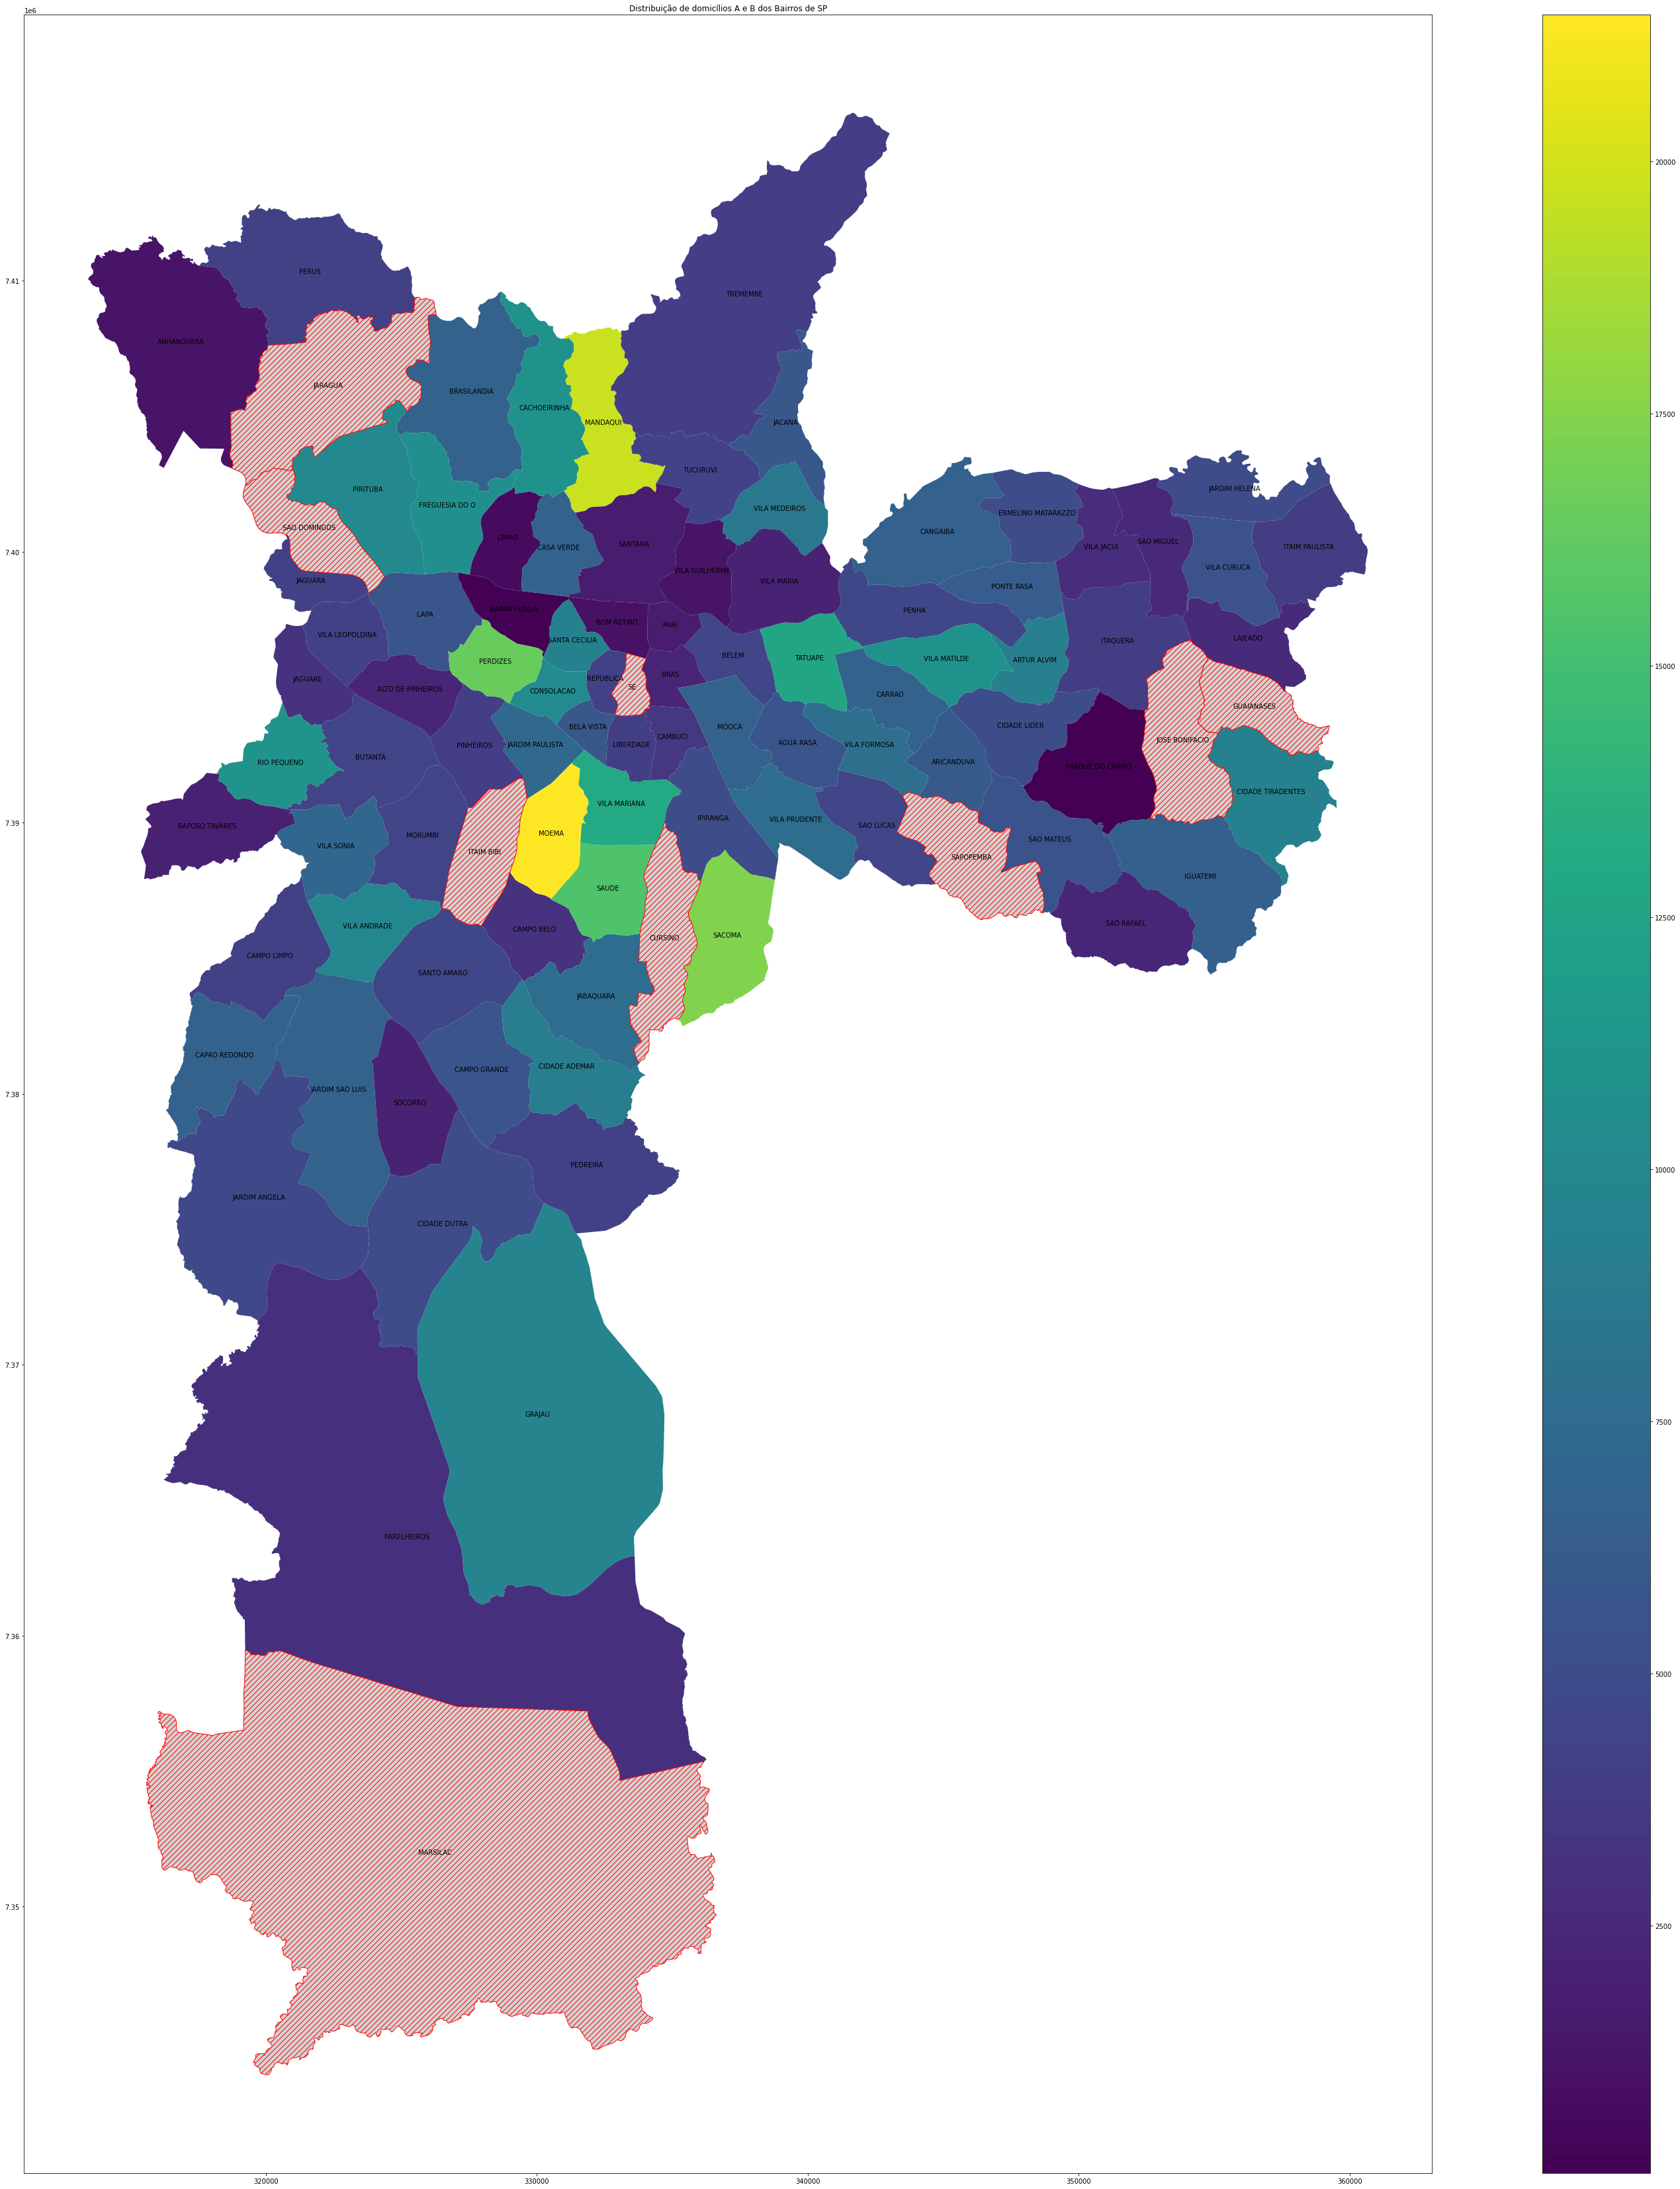

In [113]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="domicilioObjetivoSize", legend=True,
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)
plt.title('Distribuição de domicílios A e B dos Bairros de SP')

Text(0.5, 1.0, 'Distribuição da população entre 25 a 49 anos nos Bairros de SP')

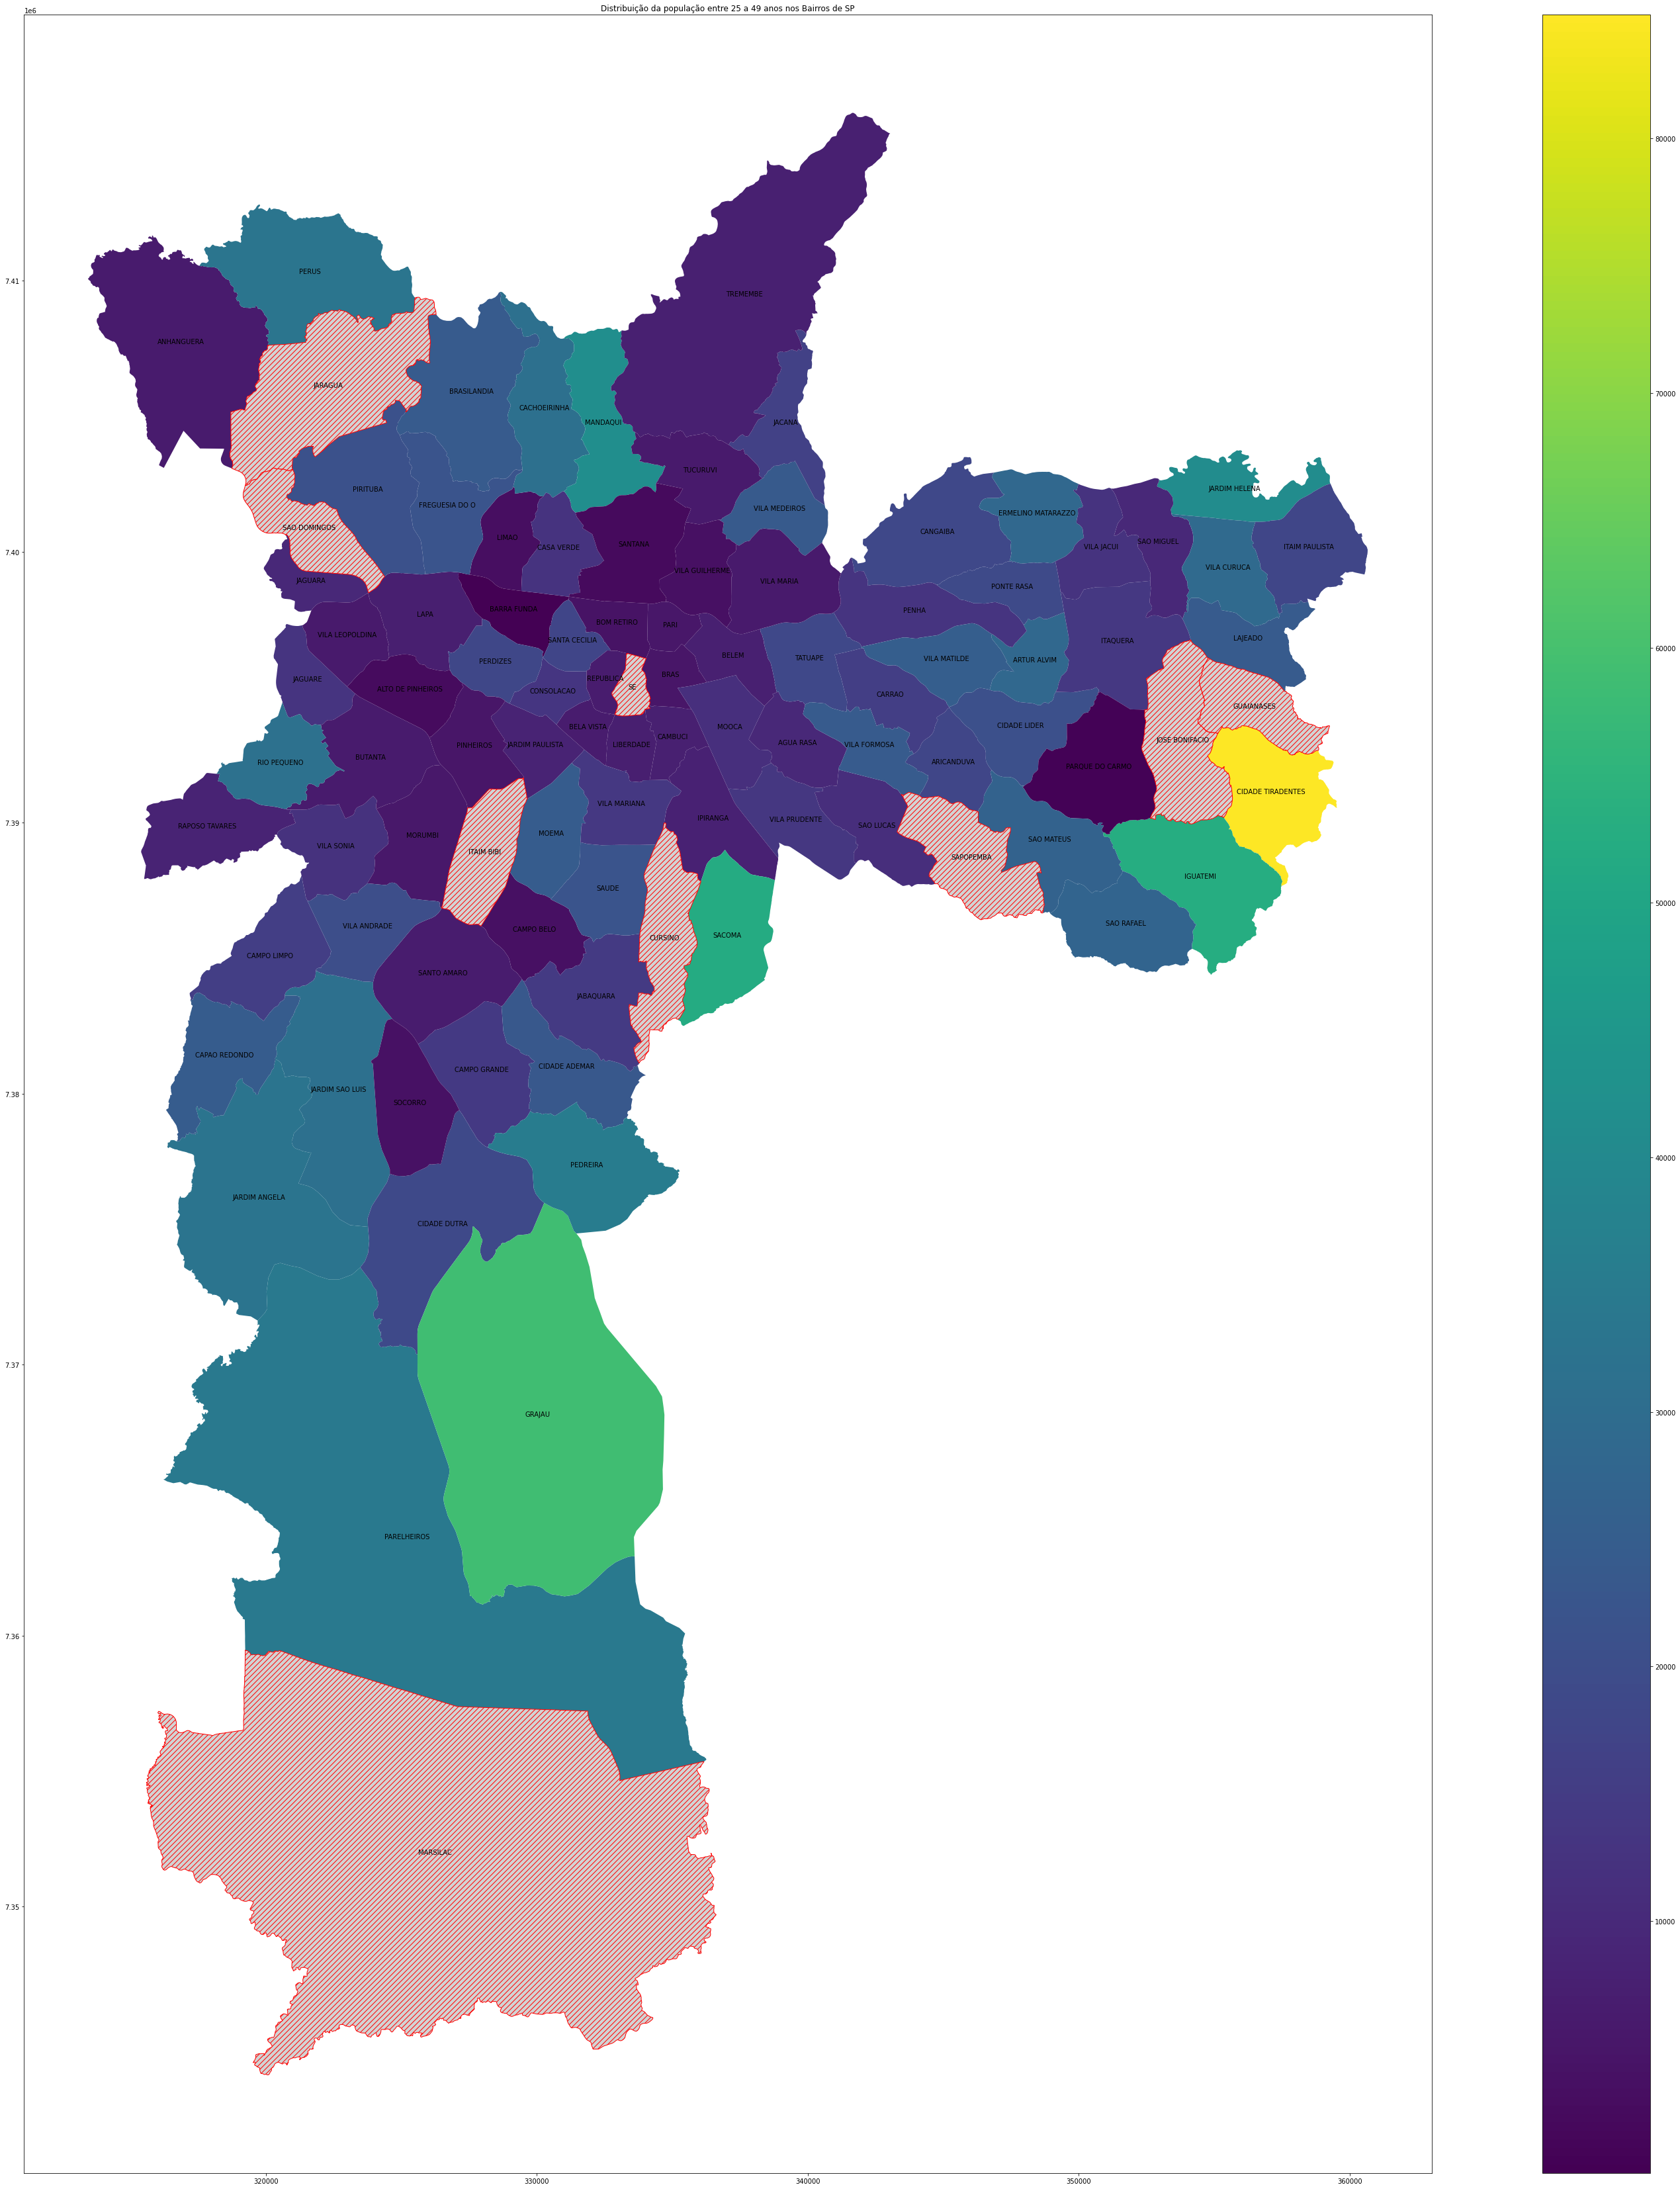

In [114]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="populacaoObjetivoSize", legend=True,
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)
plt.title('Distribuição da população entre 25 a 49 anos nos Bairros de SP')

Text(0.5, 1.0, 'Distribuição da renda média dos bairros de SP')

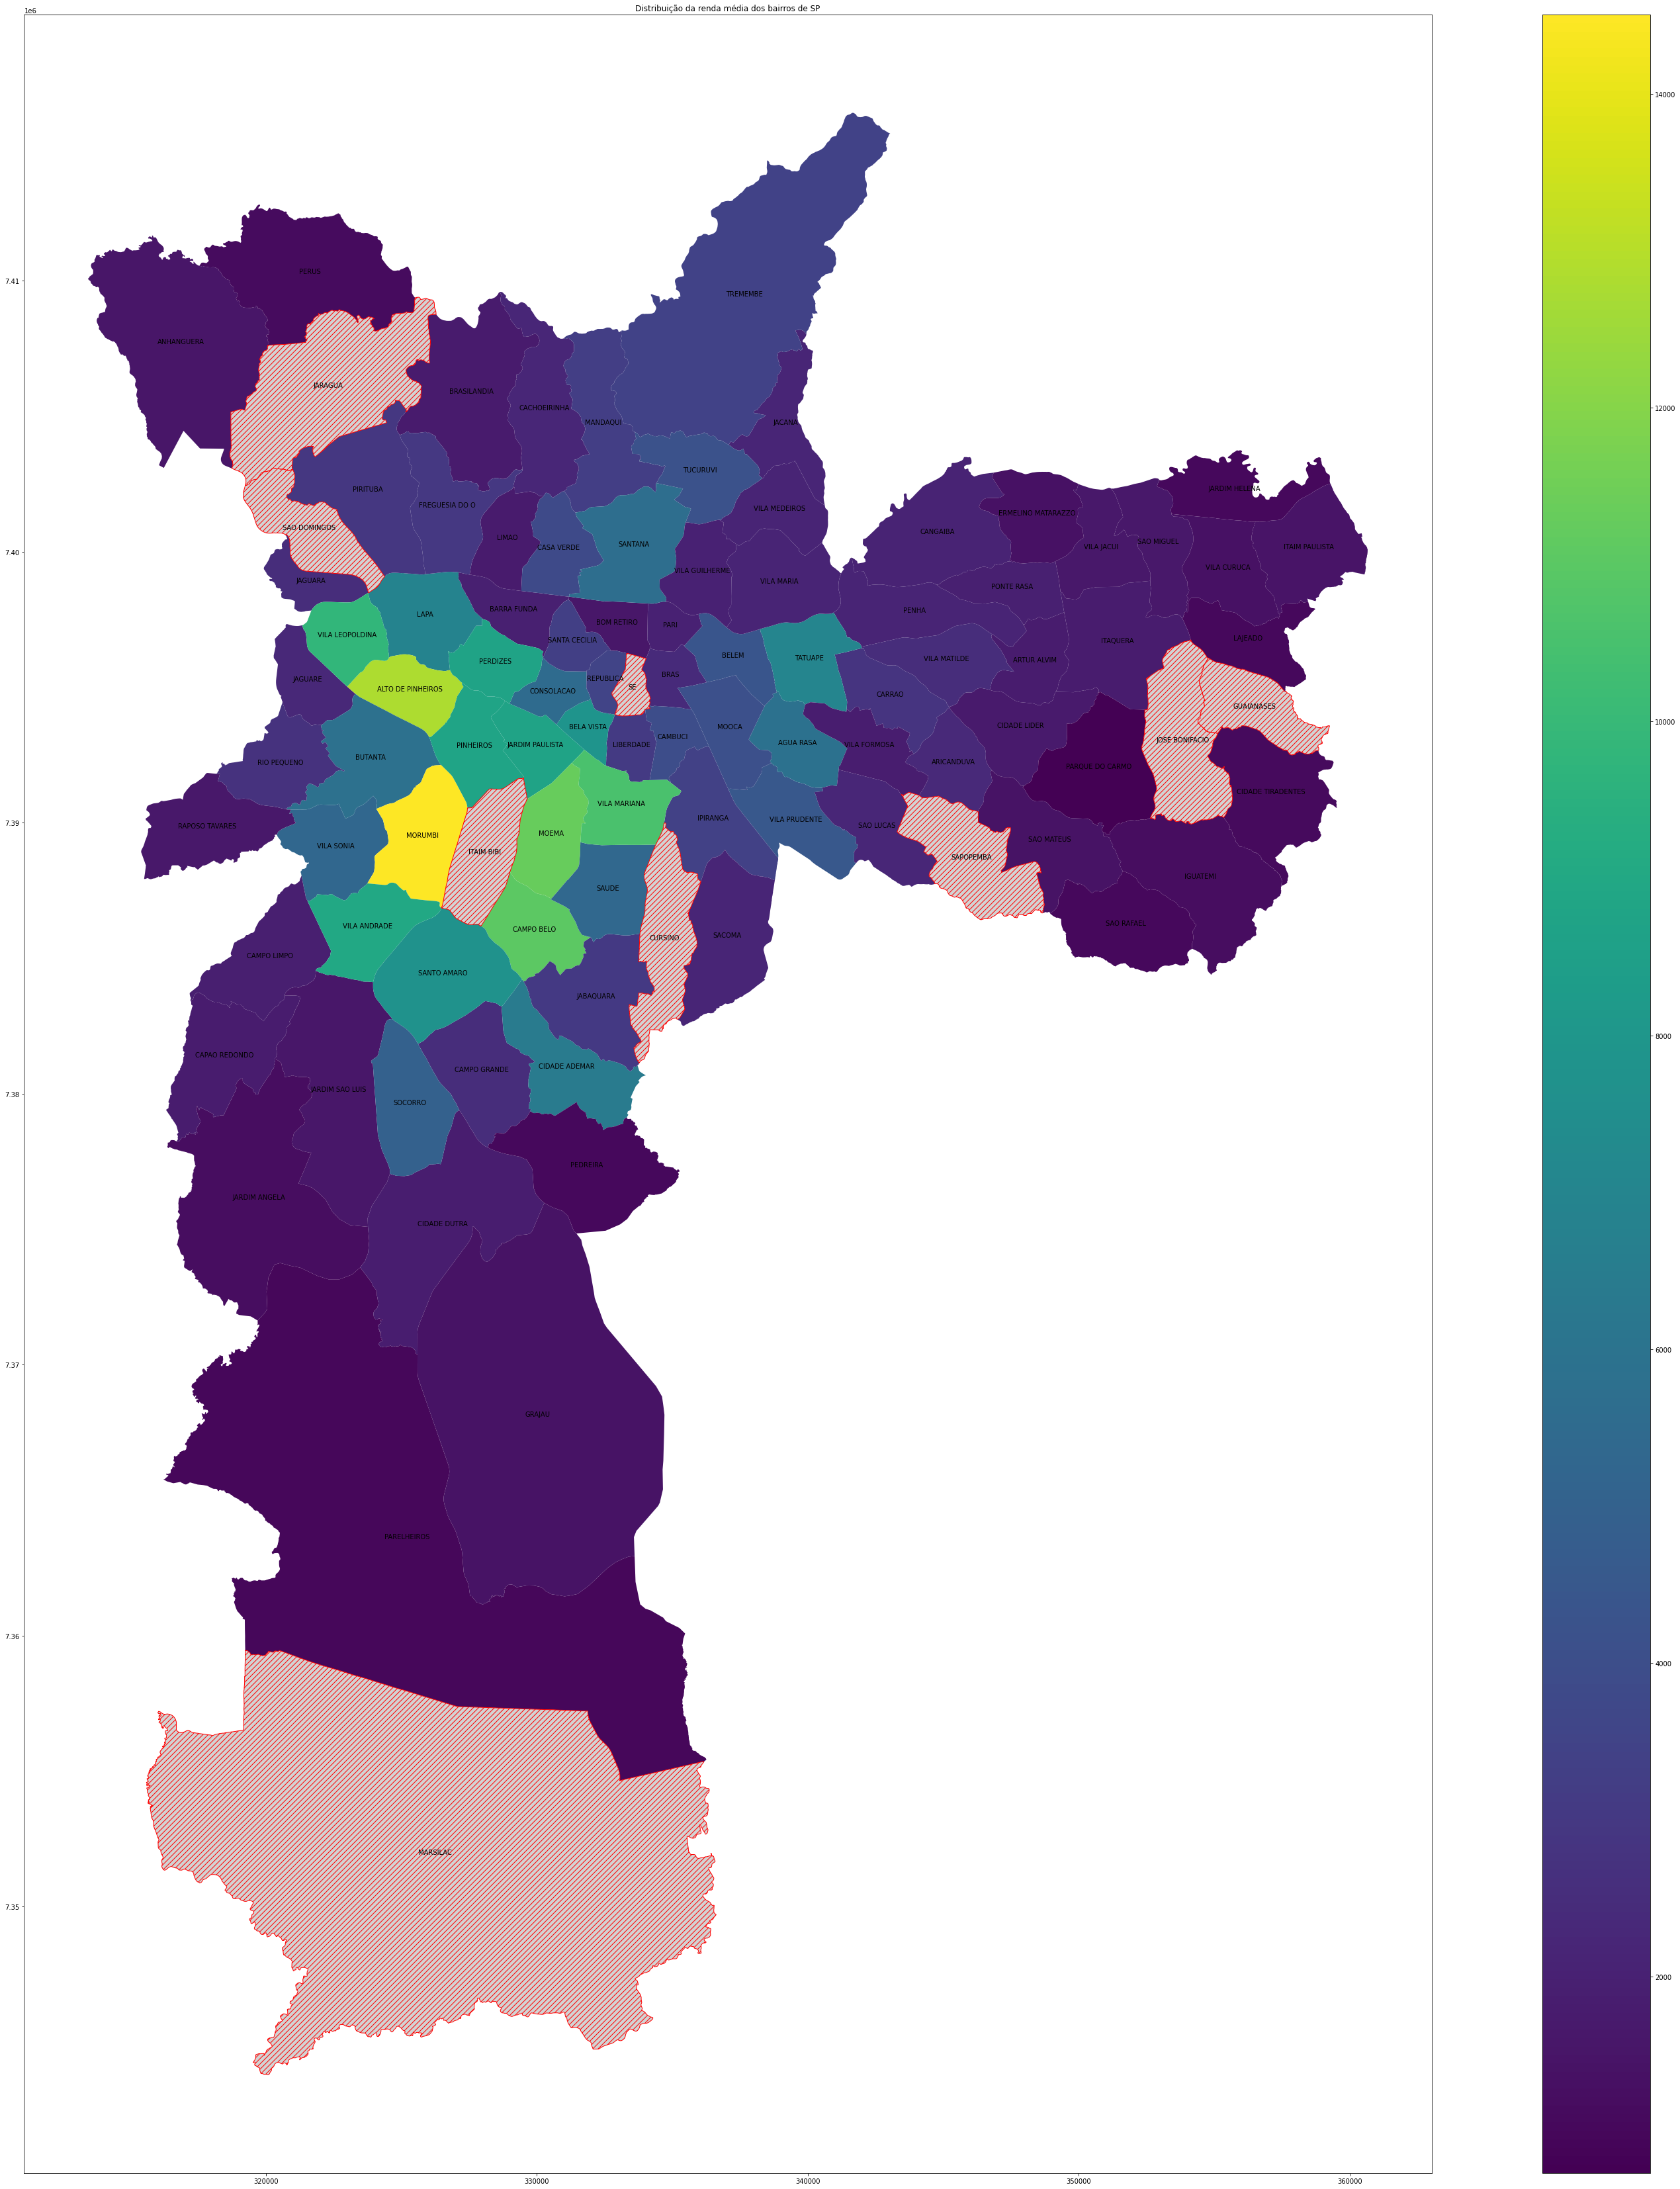

In [115]:
fig, ax = plt.subplots(figsize=(60, 60))
dfMunicipios.plot(ax=ax, column="rendaMedia", legend=True, 
                  missing_kwds={"color": "lightgrey",
                                "edgecolor": "red",
                                "hatch": "///",
                                "label": "Missing values"})
dfMunicipios.apply(lambda x: ax.annotate(text=x['bairro'],
                                         xy=x.geometry.centroid.coords[0],
                                         ha='center'), axis=1)
plt.title('Distribuição da renda média dos bairros de SP')

In [116]:
dfSPFull.nlargest(15, ['faturamento'])[['nome', 'faturamento', 'potencial']]

nome   faturamento potencial
158             Moema  2.265560e+06      Alto
199          Perdizes  2.027563e+06      Alto
243           Trianon  1.957736e+06      Alto
50      Chácara Itaim  1.928436e+06      Alto
249      Vila Andrade  1.817816e+06      Alto
276      Vila Mariana  1.744958e+06      Alto
235             Saúde  1.669111e+06      Alto
238           Tatuapé  1.637873e+06      Alto
168          Pamplona  1.626954e+06      Alto
172           Paraíso  1.613556e+06      Alto
30           Brooklin  1.604414e+06      Alto
154  Marechal Deodoro  1.599161e+06      Alto
123  Jardim Marajoara  1.579881e+06      Alto
7       Alfredo Pujol  1.567805e+06      Alto
83     Granja Julieta  1.542083e+06      Alto

In [117]:
dfSPFull.nsmallest(15, ['faturamento'])

codigo                 nome     cidade estado  população  popAte9  \
59   355030270.0    Cidade Tiradentes  São Paulo     SP   226226.0  36395.0   
63   355030292.0               Cocaia  São Paulo     SP   221487.0  34983.0   
108  355030290.0        Jardim Capela  São Paulo     SP   101574.0  18123.0   
89   355030189.0             Iguatemi  São Paulo     SP   136563.0  20724.0   
48   355030278.0   Centro Empresarial  São Paulo     SP   126509.0  17058.0   
73   355030265.0  Fábrica Bandeirante  São Paulo     SP   111206.0  16484.0   
82   355030291.0               Grajaú  São Paulo     SP   150639.0  20958.0   
76   355030263.0        Fazenda Itaim  São Paulo     SP   111222.0  17003.0   
125  355030196.0        Jardim Miriam  São Paulo     SP   140491.0  19639.0   
169  355030229.0     Parada De Taipas  São Paulo     SP   149250.0  21575.0   
293  355030162.0       Vila Terezinha  São Paulo     SP   122359.0  18304.0   
119  355030257.0        Jardim Helena  São Paulo     SP   109270.0  15503.0   
113  355030163.0      Jardim Damsceno  São Paulo     SP    96382.0  15442.0   
174  355030294.0          Parelheiros  São Paulo     SP    87201.0  13145.0   
187  355030286.0      Parque Fernanda  São Paulo     SP   121226.0  18122.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
59      18167.0     25637.0     18360.0     36577.0  ...       18403.0   
63      17783.0     25079.0     18525.0     36410.0  ...       17662.0   
108      8776.0     11974.0      8225.0     16715.0  ...        7448.0   
89      10471.0     15429.0     11234.0     21246.0  ...       10458.0   
48       8493.0     12346.0     10506.0     21851.0  ...       10321.0   
73       8577.0     12858.0      9547.0     17088.0  ...        7959.0   
82      10747.0     16137.0     12378.0     24911.0  ...       12119.0   
76       8773.0     12710.0      9168.0     17490.0  ...        8854.0   
125      9538.0     13959.0     11938.0     23786.0  ...       11478.0   
169     10879.0     15402.0     11427.0     24493.0  ...       12602.0   
293      9304.0     13258.0      9965.0     19248.0  ...        9450.0   
119      8006.0     11986.0      8789.0     16643.0  ...        7080.0   
113      7864.0     10732.0      8112.0     15819.0  ...        6994.0   
174      7000.0      9758.0      6902.0     14290.0  ...        6352.0   
187      8920.0     12845.0     10239.0     21068.0  ...        9692.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia    faturamento  \
59        21117.0       6680.0      14325.0      1123.0   64548.743229   
63        19980.0       6016.0      15001.0      1121.0   66391.403385   
108        9087.0       3529.0       8170.0       952.0   81880.660406   
89        11951.0       4113.0       8549.0      1182.0   85224.442441   
48        11811.0       3246.0       8692.0      1324.0   99524.653080   
73         9511.0       3053.0       8799.0      1084.0  100985.981325   
82        11877.0       4183.0       9010.0      1404.0  102451.004643   
76         9741.0       3254.0       8023.0      1047.0  102768.785120   
125       11739.0       3683.0       9706.0      1320.0  104507.614018   
169       12033.0       4037.0       8111.0      1392.0  105900.744008   
293       11473.0       3218.0       7540.0      1252.0  107967.342745   
119        8041.0       3037.0      10127.0      1056.0  114249.520057   
113        8334.0       2369.0       7892.0      1078.0  117587.642529   
174        7318.0       2571.0       7513.0      1004.0  120964.999067   
187       10526.0       3657.0       8693.0      1187.0  121279.034715   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
59       Médio                84863.0                 9409.0   
63       Médio                87183.0                 8927.0   
108      Médio                39793.0                 2789.0   
89       Médio                52445.0                 6557.0   
48       Médio                50946.0                 8

In [118]:
dfSPFull.nlargest(15, ['rendaMedia'])

codigo                 nome     cidade estado  população  popAte9  \
118  355030140.0        Jardim Europa  São Paulo     SP    13371.0    981.0   
140  355030210.0         Jockey Clube  São Paulo     SP     4298.0    301.0   
122   35503075.0     Jardim Lusitânia  São Paulo     SP     2115.0    106.0   
166   35503026.0             Pacaembu  São Paulo     SP    10016.0    626.0   
161  355030209.0              Morumbi  São Paulo     SP    15104.0   1145.0   
246  355030131.0      Viera De Morais  São Paulo     SP    24098.0   2013.0   
282   35503073.0  Vila Nova Conceição  São Paulo     SP    10691.0    843.0   
51    35503046.0       Chácara Klabin  São Paulo     SP    16839.0   1381.0   
10   355030141.0    Alto De Pinheiros  São Paulo     SP     8046.0    564.0   
214  355030211.0          Real Parque  São Paulo     SP    22088.0   2818.0   
243   35503079.0              Trianon  São Paulo     SP    32963.0   2003.0   
50   355030132.0        Chácara Itaim  São Paulo     SP    28697.0   1925.0   
172   35503049.0              Paraíso  São Paulo     SP    25642.0   1629.0   
188   35503074.0    Parque Ibirapuera  São Paulo     SP     4617.0    253.0   
49   355030205.0        Chácara Flora  São Paulo     SP    14523.0   1126.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
118       470.0       745.0       588.0      1349.0  ...         299.0   
140       151.0       243.0       275.0       519.0  ...          98.0   
122        70.0       125.0       119.0       232.0  ...          48.0   
166       288.0       557.0       661.0      1103.0  ...         251.0   
161       588.0       861.0       861.0      2060.0  ...         455.0   
246       802.0      1235.0      1293.0      3461.0  ...         758.0   
282       303.0       504.0       513.0      1532.0  ...         268.0   
51        616.0      1078.0      1025.0      2463.0  ...         551.0   
10        287.0       502.0       403.0       828.0  ...         143.0   
214      1312.0      1929.0      1433.0      3153.0  ...         583.0   
243       816.0      1594.0      1807.0      4677.0  ...         905.0   
50        662.0      1223.0      1372.0      4809.0  ...         980.0   
172       628.0      1160.0      1512.0      3847.0  ...         915.0   
188       136.0       237.0       256.0       623.0  ...         149.0   
49        562.0       864.0       695.0      1588.0  ...         390.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia   faturamento  \
118          67.0          0.0        505.0     21677.0  1.497355e+06   
140          73.0         31.0        189.0     19585.0  1.233113e+06   
122          17.0          0.0         82.0     15113.0  1.082916e+06   
166          92.0         63.0        433.0     15057.0  1.348964e+06   
161         271.0        101.0        606.0     14504.0  1.354540e+06   
246         447.0         78.0       1038.0     13650.0  1.540431e+06   
282         116.0          0.0        733.0     13633.0  1.336378e+06   
51          163.0         77.0        403.0     13218.0  1.411021e+06   
10           98.0          0.0        236.0     12793.0  1.222099e+06   
214         987.0        302.0       1813.0     12706.0  1.329240e+06   
243         472.0          0.0       2315.0     12550.0  1.957736e+06   
50          332.0          0.0       1105.0     12424.0  1.928436e+06   
172         324.0          0.0        491.0     11686.0  1.613556e+06   
188          49.0          0.0        202.0     11613.0  1.053430e+06   
49          183.0          0.0        372.0     11500.0  1.325198e+06   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
118      Médio                 4237.0                 4394.0   
140      Médio                 1454.0                  924.0   
122      Médio                  666.0                  511.0   
166      Médio                 3105.0                 3158.0   
161       Alto                 5629.0                 4319.0   
246    

In [119]:
dfSPFull.nlargest(15, ['populacaoObjetivoSize'])

codigo                 nome     cidade estado  população  popAte9  \
63   355030292.0               Cocaia  São Paulo     SP   221487.0  34983.0   
59   355030270.0    Cidade Tiradentes  São Paulo     SP   226226.0  36395.0   
82   355030291.0               Grajaú  São Paulo     SP   150639.0  20958.0   
169  355030229.0     Parada De Taipas  São Paulo     SP   149250.0  21575.0   
125  355030196.0        Jardim Miriam  São Paulo     SP   140491.0  19639.0   
89   355030189.0             Iguatemi  São Paulo     SP   136563.0  20724.0   
222   35503059.0               Sacomã  São Paulo     SP   131007.0  15491.0   
48   355030278.0   Centro Empresarial  São Paulo     SP   126509.0  17058.0   
187  355030286.0      Parque Fernanda  São Paulo     SP   121226.0  18122.0   
294  355030157.0            Vila Zatt  São Paulo     SP   125864.0  14670.0   
293  355030162.0       Vila Terezinha  São Paulo     SP   122359.0  18304.0   
149  355030249.0             Limoeiro  São Paulo     SP   119634.0  16966.0   
76   355030263.0        Fazenda Itaim  São Paulo     SP   111222.0  17003.0   
151  355030168.0             Mandaqui  São Paulo     SP   108235.0  10460.0   
73   355030265.0  Fábrica Bandeirante  São Paulo     SP   111206.0  16484.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
63      17783.0     25079.0     18525.0     36410.0  ...       17662.0   
59      18167.0     25637.0     18360.0     36577.0  ...       18403.0   
82      10747.0     16137.0     12378.0     24911.0  ...       12119.0   
169     10879.0     15402.0     11427.0     24493.0  ...       12602.0   
125      9538.0     13959.0     11938.0     23786.0  ...       11478.0   
89      10471.0     15429.0     11234.0     21246.0  ...       10458.0   
222      7279.0     11248.0      9278.0     20806.0  ...        9817.0   
48       8493.0     12346.0     10506.0     21851.0  ...       10321.0   
187      8920.0     12845.0     10239.0     21068.0  ...        9692.0   
294      7305.0     11225.0      9338.0     18841.0  ...       10012.0   
293      9304.0     13258.0      9965.0     19248.0  ...        9450.0   
149      8575.0     12832.0     10067.0     19137.0  ...        8990.0   
76       8773.0     12710.0      9168.0     17490.0  ...        8854.0   
151      5343.0      8437.0      7250.0     15585.0  ...        7147.0   
73       8577.0     12858.0      9547.0     17088.0  ...        7959.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia   faturamento  \
63        19980.0       6016.0      15001.0      1121.0  6.639140e+04   
59        21117.0       6680.0      14325.0      1123.0  6.454874e+04   
82        11877.0       4183.0       9010.0      1404.0  1.024510e+05   
169       12033.0       4037.0       8111.0      1392.0  1.059007e+05   
125       11739.0       3683.0       9706.0      1320.0  1.045076e+05   
89        11951.0       4113.0       8549.0      1182.0  8.522444e+04   
222        7580.0       2429.0       7780.0      2191.0  6.068862e+05   
48        11811.0       3246.0       8692.0      1324.0  9.952465e+04   
187       10526.0       3657.0       8693.0      1187.0  1.212790e+05   
294        8082.0       2856.0       6853.0      1936.0  3.581400e+05   
293       11473.0       3218.0       7540.0      1252.0  1.079673e+05   
149        9868.0       3368.0       8419.0      1259.0  1.403871e+05   
76         9741.0       3254.0       8023.0      1047.0  1.027688e+05   
151        5291.0       1331.0       5035.0      3231.0  1.417452e+06   
73         9511.0       3053.0       8799.0      1084.0  1.009860e+05   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
63       Médio                87183.0                 8927.0   
59       Médio                84863.0                 9409.0   
82        Alto                58950.0                 9715.0   
169      Médio                58701.0                 9715.0   
125      Médio                54699.0                 8722.0   
89     

In [120]:
dfSPFull.nlargest(15, ['domicilioObjetivoSize'])

codigo                 nome     cidade estado  população  popAte9  \
158   35503072.0                Moema  São Paulo     SP    60709.0   4607.0   
151  355030168.0             Mandaqui  São Paulo     SP   108235.0  10460.0   
222   35503059.0               Sacomã  São Paulo     SP   131007.0  15491.0   
199   35503081.0             Perdizes  São Paulo     SP    47046.0   3544.0   
235   35503068.0                Saúde  São Paulo     SP    55175.0   4337.0   
294  355030157.0            Vila Zatt  São Paulo     SP   125864.0  14670.0   
276   35503043.0         Vila Mariana  São Paulo     SP    38935.0   2280.0   
238  355030105.0              Tatuapé  São Paulo     SP    51812.0   3616.0   
154   35503029.0     Marechal Deodoro  São Paulo     SP    43550.0   3208.0   
243   35503079.0              Trianon  São Paulo     SP    32963.0   2003.0   
50   355030132.0        Chácara Itaim  São Paulo     SP    28697.0   1925.0   
288  355030126.0  Vila Santa Catarina  São Paulo     SP    64419.0   7477.0   
218  355030223.0          Rio Pequeno  São Paulo     SP    79567.0   9128.0   
32   355030165.0         Cachoeirinha  São Paulo     SP    80996.0   9392.0   
7     35503097.0        Alfredo Pujol  São Paulo     SP    39310.0   2720.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
158      1757.0      3051.0      3144.0      9882.0  ...        1881.0   
151      5343.0      8437.0      7250.0     15585.0  ...        7147.0   
222      7279.0     11248.0      9278.0     20806.0  ...        9817.0   
199      1505.0      2618.0      2762.0      7563.0  ...        1602.0   
235      1880.0      3240.0      3476.0      9359.0  ...        2325.0   
294      7305.0     11225.0      9338.0     18841.0  ...       10012.0   
276      1010.0      2133.0      2642.0      6248.0  ...        1956.0   
238      1925.0      3425.0      3131.0      6445.0  ...        3111.0   
154      1416.0      2520.0      2772.0      6921.0  ...        2933.0   
243       816.0      1594.0      1807.0      4677.0  ...         905.0   
50        662.0      1223.0      1372.0      4809.0  ...         980.0   
288      3491.0      5257.0      4307.0     10517.0  ...        4136.0   
218      4319.0      6593.0      6203.0     13671.0  ...        5611.0   
32       4605.0      7149.0      5929.0     12761.0  ...        6236.0   
7        1317.0      2422.0      2351.0      5431.0  ...        2081.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia   faturamento  \
158         736.0          0.0       3719.0     11332.0  2.265560e+06   
151        5291.0       1331.0       5035.0      3231.0  1.417452e+06   
222        7580.0       2429.0       7780.0      2191.0  6.068862e+05   
199         537.0          0.0       1393.0      8707.0  2.027563e+06   
235        1796.0        374.0       2248.0      5330.0  1.669111e+06   
294        8082.0       2856.0       6853.0      1936.0  3.581400e+05   
276         822.0          0.0       1362.0     10575.0  1.744958e+06   
238        1699.0        443.0       2221.0      6994.0  1.637873e+06   
154        1348.0        155.0       3066.0      5490.0  1.599161e+06   
243         472.0          0.0       2315.0     12550.0  1.957736e+06   
50          332.0          0.0       1105.0     12424.0  1.928436e+06   
288        3585.0       1159.0       3116.0      4148.0  1.311406e+06   
218        5024.0       1336.0       4096.0      2690.0  8.524528e+05   
32         5325.0        993.0       3393.0      2224.0  9.732392e+05   
7          1083.0         13.0       1561.0      6586.0  1.567805e+06   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
158       Alto                24444.0                21456.0   
151       Alto                41587.0                19710.0   
222       Alto                52001.0                17394.0   
199       Alto                18203.0                16520.0   
235       Alto                21984.0                15445.0   
294    

In [121]:
dfSPFull[dfSPFull['faturamento'] < 0]

Empty DataFrame
Columns: [codigo, nome, cidade, estado, população, popAte9, popDe10a14, popDe15a19, popDe20a24, popDe25a34, popDe35a49, popDe50a59, popMaisDe60, domiciliosA1, domiciliosA2, domiciliosB1, domiciliosB2, domiciliosC1, domiciliosC2, domiciliosD, domiciliosE, rendaMedia, faturamento, potencial, populacaoObjetivoSize, domicilioObjetivoSize, nomeProcessado]
Index: []

[0 rows x 27 columns]

In [122]:
dfSPFull[dfSPFull['rendaMedia'] == 0]

codigo                   nome     cidade estado  população  popAte9  \
72   355030170.0             Eta Guaraú  São Paulo     SP        0.0      0.0   
201  355030227.0        Pico Do Jaraguá  São Paulo     SP        0.0      0.0   
216  355030167.0  Reserva Da Cantareira  São Paulo     SP        0.0      0.0   

     popDe10a14  popDe15a19  popDe20a24  popDe25a34  ...  domiciliosC1  \
72          0.0         0.0         0.0         0.0  ...           0.0   
201         0.0         0.0         0.0         0.0  ...           0.0   
216         0.0         0.0         0.0         0.0  ...           0.0   

     domiciliosC2  domiciliosD  domiciliosE  rendaMedia    faturamento  \
72            0.0          0.0          0.0         0.0  796228.933256   
201           0.0          0.0          0.0         0.0  796228.933256   
216           0.0          0.0          0.0         0.0  796228.933256   

     potencial  populacaoObjetivoSize  domicilioObjetivoSize  \
72       Baixo                    0.0                    0.0   
201      Baixo                    0.0                    0.0   
216      Baixo                    0.0                    0.0   

            nomeProcessado  
72              ETA GUARAU  
201        PICO DO JARAGUA  
216  RESERVA DA CANTAREIRA  

[3 rows x 27 columns]